# ALS sample analysis

In [2]:
from env import neptune_api_token

config = {
    'entity': 'ejmockler',
    'project': 'ALS-NUPS-NoHyperParamOptimization',
    'neptuneApiToken': neptune_api_token,
    'crossValIterations': 10
}

## For remote run tracker ([neptune.ai](neptune.ai))

In [4]:
import neptune
import pandas as pd
import os
import multiprocess as multiprocessing

In [5]:
project = neptune.init_project(project=config['entity'] + '/' + config['project'], api_token=config['neptuneApiToken'])
runs_table_df = project.fetch_runs_table().to_pandas()

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/


In [4]:
import multiprocess as multiprocessing
import neptune
import os
%env NEPTUNE_ALLOW_SELF_SIGNED_CERTIFICATE='TRUE'

def download_file(run_id, field='sampleResults', extension='csv'):
    path = f'./{field}/{run_id}.{extension}'
    if not os.path.exists(field):
        os.mkdir(field)
    if os.path.isfile(path): 
        return
    run = neptune.init_run(with_id=run_id, project=config['entity'] + '/' + config['project'], api_token=config['neptuneApiToken'])
    if field == 'globalFeatureImportance' or field == 'testLabels':
        for i in range(11):
            try:
                path = f'./{field}/{run_id}_{i}.{extension}'
                run[f"{field}/{i}"].download(destination=path)
            except:
                pass
    else: run[field].download(destination=path)
    run.stop()
    

# Get the number of available CPUs
cpu_count = multiprocessing.cpu_count()

# Create a list of tuples containing the run ID and the corresponding function call
#sample_probability_tasks = [(download_file, run['sys/id']) for _, run in runs_table_df.iterrows()]
sample_label_tasks = [(download_file, run['sys/id'], 'testLabels', 'csv') for _, run in runs_table_df.iterrows()]
# shap_tasks = [(download_file, run['sys/id'], 'shapExplanationsPerFold', 'pkl') for _, run in runs_table_df.iterrows()]
#embedding_tasks = [(download_file, run['sys/id'], 'embedding', 'csv') for _, run in runs_table_df.iterrows()]
# global_importance_tasks = [(download_file, run['sys/id'], 'globalFeatureImportance', 'csv') for _, run in runs_table_df.iterrows()]

with multiprocessing.Pool(cpu_count) as pool:
    # Use the multiprocessing Pool to map the tasks to different processes
    #pool.starmap(lambda func, *args: func(*args), sample_probability_tasks)
    pool.starmap(lambda func, *args: func(*args), sample_label_tasks)
    # pool.starmap(lambda func, *args: func(*args), shap_tasks)
    # pool.starmap(lambda func, *args: func(*args), embedding_tasks)
    # pool.starmap(lambda func, *args: func(*args), global_importance_tasks)

env: NEPTUNE_ALLOW_SELF_SIGNED_CERTIFICATE='TRUE'


/tmp/ipykernel_569183/1142206006.py:12: NeptuneWarning: To avoid unintended consumption of logging hours during interactive sessions, the following monitoring options are disabled unless set to 'True' when initializing the run: 'capture_stdout', 'capture_stderr', and 'capture_hardware_metrics'.
  run = neptune.init_run(with_id=run_id, project=config['entity'] + '/' + config['project'], api_token=config['neptuneApiToken'])
/tmp/ipykernel_569183/1142206006.py:12: NeptuneWarning: To avoid unintended consumption of logging hours during interactive sessions, the following monitoring options are disabled unless set to 'True' when initializing the run: 'capture_stdout', 'capture_stderr', and 'capture_hardware_metrics'.
  run = neptune.init_run(with_id=run_id, project=config['entity'] + '/' + config['project'], api_token=config['neptuneApiToken'])
/tmp/ipykernel_569183/1142206006.py:12: NeptuneWarning: To avoid unintended consumption of logging hours during interactive sessions, the following 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1693
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1735
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1658
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1644
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1651
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1700
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1707
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1749
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1665
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1672
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1721
https://new-ui.neptune.ai/ejmock

In [7]:
from functools import partial
import pandas as pd

def process_csv(file_path, keepRunId=False):
    df = pd.read_csv(file_path)
    filename_stem = os.path.splitext(os.path.basename(file_path))[0]
    if keepRunId: df['run'] = filename_stem
    return df

def process_attribute(dataframe, run_id, field):
    run = neptune.init_run(with_id=run_id, project=config['entity'] + '/' + config['project'], api_token=config['neptuneApiToken'])
    try:
        dataframe[field] = [*run[field].fetch()] * len(dataframe)
    except:
        pass
    run.stop()
    return dataframe

result_path = 'sampleResults/'
embedding_path = 'embedding/'
result_file_list = []

def build_file_list(path):
    file_list = []
    for filename in os.listdir(path):
        if filename.endswith(".csv"):
            file_path = os.path.join(path, filename)
            file_list.append(file_path)
    return file_list

#globalImportance_path = 'globalFeatureImportance/'
#globalImportance_file_list = build_file_list(globalImportance_path)
    
result_file_list = build_file_list(result_path)
embedding_path_list = build_file_list(embedding_path)

with multiprocessing.Pool() as pool:
    processSampleResultCSV = partial(process_csv, keepRunId=True)
    dataframes = pool.map(processSampleResultCSV, result_file_list)
    embeddingDataframes = pool.map(process_csv, embedding_path_list)
    # globalFeatureImportanceDataframes = pool.map(process_csv, globalImportance_file_list)
    dataframes = pool.starmap(process_attribute, [(df, run_id, 'sys/tags') for df, run_id in zip(dataframes, runs_table_df['sys/id'])])

sampleResults = pd.concat(dataframes, ignore_index=False)
sampleResults = sampleResults.rename({'sys/tags': 'model'}, axis=1)

embedding = pd.concat(embeddingDataframes, ignore_index=False).drop_duplicates()
embedding.index.name = 'id'

# globalImportances = pd.concat(globalFeatureImportanceDataframes, ignore_index=False)

/tmp/ipykernel_685110/1665053952.py:11: NeptuneWarning: To avoid unintended consumption of logging hours during interactive sessions, the following monitoring options are disabled unless set to 'True' when initializing the run: 'capture_stdout', 'capture_stderr', and 'capture_hardware_metrics'.
  run = neptune.init_run(with_id=run_id, project=config['entity'] + '/' + config['project'], api_token=config['neptuneApiToken'])
/tmp/ipykernel_685110/1665053952.py:11: NeptuneWarning: To avoid unintended consumption of logging hours during interactive sessions, the following monitoring options are disabled unless set to 'True' when initializing the run: 'capture_stdout', 'capture_stderr', and 'capture_hardware_metrics'.
  run = neptune.init_run(with_id=run_id, project=config['entity'] + '/' + config['project'], api_token=config['neptuneApiToken'])
/tmp/ipykernel_685110/1665053952.py:11: NeptuneWarning: To avoid unintended consumption of logging hours during interactive sessions, the following 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1749
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1742
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1735
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1721
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1707
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1714
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1700
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1693
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1686
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1679
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk an

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread 

Shutting down background jobs, please wait a moment...


NeptuneAsyncOpProcessor

Shutting down background jobs, please wait a moment...


    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
response_spec = get_response_spec(status_code=response.status_code, op=op)    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec

    raise MatchingResponseNotFound(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

bravado_core.exception    

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1672


response_spec = get_response_spec(status_code=response.status_code, op=op).
MatchingResponseNotFound  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
:     Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.raise MatchingResponseNotFound(

During handling of the above exception, another exception occurred:



Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Traceback (most recent call last):



Shutting down background jobs, please wait a moment...


Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
bravado_core.exceptionNeptuneAsyncOpProcessor    .:
return FinishedApiResponseFuture(future.response())  # wait synchronously

Shutting down background jobs, please wait a moment...


Traceback (most recent call last):

MatchingResponseNotFound  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
:         Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore


During handling of the above exception, another exception occurred:

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
swagger_result = self._get_swagger_result(incoming_response)Traceback (most recent call last):
    
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packa

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
NeptuneAsyncOpProcessor
          File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
:
raise value.with_traceback(tb)    
Traceback (most recent call last):
return func(self, *args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

unmarshal_response(      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
inc

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1665


response_spec = get_response_spec(status_code=response.status_code, op=op)    response_spec = get_response_spec(status_code=response.status_code, op=op)
six.reraise(raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        raise MatchingResponseNotFound(
    bravado_core.exceptionraise value.with_traceback(tb)incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore.
    
MatchingResponseNotFound  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/

Shutting down background jobs, please wait a moment...


HTTPPaymentRequired    swagger_result = self._get_swagger_result(incoming_response)
self.run(): 
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    
raise MatchingResponseNotFound(    
The above exception was the direct cause of the following exception:


return func(self, *args, **kwargs)
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
bravado.exception
  File "/home/noot/.pyenv/versions/miniconda3-latest/l

Shutting down background jobs, please wait a moment...


HTTPPaymentRequired      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
: super().run()    402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.    unmarshal_response(


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    self.run()    self.work()



https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1658


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
six.reraise(      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work

super().run()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise

The above exception was the direct cause of the following exception:

    
self.process_batch([element.obj for element in batch], batch[-1].ver)Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
raise value.with_traceback(tb)
      File "/home/noot/.pyenv/versions/miniconda3-late

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
Exception in thread     super().run()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
Exception in thread processed_count, errors = self._processor._backend.execute_operations(NeptuneAsyncOpProcessorNeptuneAsyncOpProcessor
        :

:
self.process_batch([element.obj for element in batch], batch[-1].ver)response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
Traceback (most

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1651


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    
self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
            raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception

Shutting down background jobs, please wait a moment...


self.process_batch([element.obj for element in batch], batch[-1].ver)result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper

        

During handling of the above exception, another exception occurred:

result = func(self_, *args, **kwargs)processed_count, errors = self._processor._backend.execute_operations(
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


return FinishedApiResponseFuture(future.response())  # wait synchronously    
Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    raise MatchingResponseNotFound(    

bravado_core.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
.MatchingResponseNotFound    self._execute_operations(swagger_result = self._get_swagger_result(incoming_response)NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__

: processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
:
    neptune.exceptionsResponse spec

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1644




    :     neptune.exceptionsresponse_spec = get_response_spec(status_code=response.status_code, op=op)six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
.

raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
neptune.exceptions

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not 

Shutting down background jobs, please wait a moment...


:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise

    Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.response_spec = get_response_spec(status_code=response.status_code, op=op)

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors

During handling of the above exception, another exception occurred:

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
raise value.with_traceback(tb)raise NeptuneLimitExceedException(reason=body.

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.
Shutting down background jobs, please wait a moment...


    
self.run()Exception in thread self.process_batch([element.obj for element in batch], batch[-1].ver)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
NeptuneAsyncOpProcessor



Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


:
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
Exception in thread Traceback (most recent call last):
return func(*args, **kwargs)    NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
:

          File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
super().run()incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreTraceback (most recent call last):
result = func(self_, *args, **kwargs)
    
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


raise value.with_traceback(tb)raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
Exception in thread Exception in thread 
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    NeptuneAsyncOpProcessor:
    neptune.exceptionsraise value.with_traceback(tb)

Shutting down background jobs, please wait a moment...


NeptuneAsyncOpProcessorTraceback (most recent call last):
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore.
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
:
NeptuneLimitExceedException      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
Traceback (most recent call last):
:     incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. 

Shutting down background jobs, please wait a moment...


return func(self, *args, **kwargs)self.work()    return func(self, *args, **kwargs)

self.process_batch([element.obj for element in batch], batch[-1].ver)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
unmarshal_response(        
    result = func(self_, *args, **kwargs)unmarshal_response(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
self.process_batch([ele

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


processed_count, errors = self._processor._backend.execute_operations(        Exception in thread self._execute_operations(
NeptuneAsyncOpProcessorincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations

raise value.with_traceback(tb)
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
          File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", lin

Shutting down background jobs, please wait a moment...


result = self.leaderboard_client.api.executeOperations(**kwargs).response().result  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    
    raise MatchingResponseNotFound(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
self.process_batch([element.obj for element in batch], batch[-1].ver)

    bravado.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
self.handle_neptune_http_errors(e.response, exception=e).    
HTTPPaymentRequired  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
result = func(self_, *args, **kwargs): 
402 Payment Required: R

Shutting down background jobs, please wait a moment...


.NeptuneLimitExceedException: 

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.




----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help
Exception in thread 
NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.p

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread NeptuneAsyncOpProcessorincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        response_spec = get_response_spec(status_code=response.status_code, op=op)incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        raise MatchingResponseNotFound(response_spec = get_response_spec(status_code=response.status_code, op=

Shutting down background jobs, please wait a moment...



      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
self._execute_operations(    
result = func(self_, *args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
return func(*args, **kwargs)
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
processed_count, errors = self._processor._backend.execute_operations(
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
result = self.leaderbo

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations

Exception in thread neptune.exceptions    NeptuneAsyncOpProcessor.result = self.leaderboard_client.api.executeOperations(**kwargs).response().result:
NeptuneLimitExceedException
Traceback (most recent call last):
:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to o

Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    

Explore the metadata in the Neptune app:


raise value.with_traceback(tb)

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1749/metadata



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

Done!




----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help


Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1735/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1721/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1742/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1728
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1707/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1714/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1700/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoH

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise


Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1658/metadata


raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent ca

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1651/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1644/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1748
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1720
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1734
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1741
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1706
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1713
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1699
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1692
Shutting

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1685


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1678


    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(


Shutting down background jobs, please wait a moment...
Shutting down background jobs, please wait a moment...


bravado.exception.HTTPPaymentRequired

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


: Exception in thread 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.NeptuneAsyncOpProcessor
:

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreself.run()

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/opera

Shutting down background jobs, please wait a moment...


raise MatchingResponseNotFound(

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
bravado_core.exception.    MatchingResponseNotFoundself.process_batch([element.obj for element in batch], batch[-1].ver): 
Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper

    
During handling of the above exception, another exception occurred:

result = func(self_, *args, **kwargs)Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
  File "/home/noot/.pyenv/versions/min

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


        swagger_result = self._get_swagger_result(incoming_response)Exception in thread self._execute_operations(
NeptuneAsyncOpProcessor
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
Traceback (most recent call last):
          File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
return func(self, *args, **kwargs)return func(*args, **kwargs)
    
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backen

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1671


    
response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    
    Exception in thread six.reraise(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
raise MatchingResponseNotFound(NeptuneAsyncOpProcessor
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
:

self.handle_neptune_http_errors(e.response, exception=e)

Shutting down background jobs, please wait a moment...


Traceback (most recent call last):
    bravado_core.exception
raise value.with_traceback(tb)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
.
    MatchingResponseNotFoundincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
: 
    Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
incomi

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.
Shutting down background jobs, please wait a moment...


unmarshal_response(    Exception in thread return FinishedApiResponseFuture(future.response())  # wait synchronously
NeptuneAsyncOpProcessorself.run()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response

:

    Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
six.reraise(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        
    swagger_result = self._get_swagger_result(incoming_response)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
super().run()
incoming_response.swa

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1664



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run


      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
self.work()        
    return func(self, *args, **kwargs)

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
response_spec = get_response_spec(status_code=response.status_code, op=op)incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
Exception in thread     

NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
self.process_batch([element.obj for element in batch], batch[-1].ver)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    
:
        unmarshal_response(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/thre

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1657


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
Traceback (most recent call last):
        
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exceptionresult = func(self_, *args, **kwargs)    raise value.with_traceback(tb)    

self.run()
return func(self, *args, **kwargs)neptune.exceptions  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
.      File "/home/noot/.pyenv/versions/minicon

Shutting down background jobs, please wait a moment...


self._execute_operations(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception    
return func(*args, **kwargs)neptune.exceptions
.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
NeptuneLimitExceedException    : 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (defaul

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1650




  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


.Exception in thread NeptuneLimitExceedException: NeptuneAsyncOpProcessor:


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help

Traceback (most recent cal

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operati

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
NeptuneAsyncOpProcessor    :
self.handle_neptune_http_errors(e.response, exception=e)Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreraise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
neptune.exceptions    .response_spec = get_response_spec(status_

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1643


:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?

Shutting down background jobs, please wait a moment...


HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj fo

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
NeptuneAsyncOpProcessor:
    

Shutting down background jobs, please wait a moment...


Traceback (most recent call last):
processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
        self._execute_operations(incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        return func(*args, **kwargs)response_spec = get_response_spec(status_code=response.status_code, op=op)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


swagger_result = self._get_swagger_result(incoming_response)Exception in thread 
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
:
    Traceback (most recent call last):
return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
unmarshal_response(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    
response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bra

Shutting down background jobs, please wait a moment...


    
super().run()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
six.reraise(    
self.work()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
        raise value.with_traceback(tb)
self.process_batch([element.obj for element in batch], batch[-1].ver)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
  

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    
self.handle_neptune_http_errors(e.response, exception=e)Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run

NeptuneAsyncOpProcessor      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
:
super().run()Traceback (most recent call last):
    
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run

        neptune.exceptionsincoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreself.work().

NeptuneL

Shutting down background jobs, please wait a moment...


    return func(self, *args, **kwargs)self.handle_neptune_http_errors(e.response, exception=e)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
        unmarshal_response(raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
neptune.exceptions    .six.reraise(NeptuneLimitExceedException
:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. R

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread raise MatchingResponseNotFound(NeptuneAsyncOpProcessor
:
bravado.exceptionTraceback (most recent call last):
.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
HTTPPaymentRequired    : incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

The above exception was the direct cause of the following exception:

    Traceback (most recent call last):
response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _

Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    

Explore the metadata in the Neptune app:


    self.process_batch([element.obj for element in batch], batch[-1].ver)return FinishedApiResponseFuture(future.response())  # wait synchronously

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1728/metadata




  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
        result = func(self_, *args, **kwargs)swagger_result = self._get_swagger_result(incoming_response)

Shutting down background jobs, please wait a moment...




  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
        return func(self, *args, **kwargs)processed_count, errors = self._processor._backend.execute_operations(

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
        unmarshal_response(
self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


neptune.exceptionsbravado.exceptionException in thread ..NeptuneAsyncOpProcessorNeptuneLimitExceedExceptionHTTPPaymentRequired:
: : Traceback (most recent call last):
402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model met

Shutting down background jobs, please wait a moment...


    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread super().run()
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
:
    Traceback (most recent call last):
self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreself.process_batch([element.obj for element in batch], batch[-1].ver)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner


Shutting down background jobs, please wait a moment...


.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help



Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise


Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1748/metadata


raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent ca

Done!


: 

Explore the metadata in the Neptune app:




----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1720/metadata


Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1734/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1741/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1706/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1713/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1699/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1692/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1685/m

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1698



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException--

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1691
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1684
Shutting down background jobs, please wait a moment...
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    return FinishedApiResponseFuture(future.response())  # wait synchronouslyException in thread 
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
:
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
swagger_result = self._get_swagger_result(incoming_response)    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1677


return func(self, *args, **kwargs)
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    response_spec = get_response_spec(status_code=response.status_code, op=op)unmarshal_response(


Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
        raise MatchingResponseNotFound(six.reraise(

bravado_core.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
.MatchingResponseNotFound    : raise value.with_traceback(tb)Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

Shutting down background jobs, please wait a moment...


Shutting down background jobs, please wait a moment...


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
Exception in thread 
During handling of the above exception, another exception occurred:

NeptuneAsyncOpProcessor    Traceback (most recent call last):
:


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
Traceback (most recent call last):
Exception in thread 
NeptuneAsyncOpProcessor      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
:
    return FinishedApiResponseFuture(future.response())  # wait synchronouslyTraceback (most recent call last):
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_r

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper


          File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
bravado.exceptionException in thread response_spec = get_response_spec(status_code=response.status_code, op=op)

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1670


return func(self, *args, **kwargs).    NeptuneAsyncOpProcessor

HTTPPaymentRequiredraise MatchingResponseNotFound(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result

:     Traceback (most recent call last):
402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.    bravado_core.exceptionraise MatchingResponseNotFound(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

unmarshal_response(.
    
The above exception was the direct cause of the following exception:

bravado_core.exceptionincoming_response.swagger_result = unmarshal_respo

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1663


response_spec = get_response_spec(status_code=response.status_code, op=op)
    
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
result = self.leaderboard_client.api.executeOperations(**kwargs).response().result  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
            
self.work()    six.reraise(response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__

rais

Shutting down background jobs, please wait a moment...



.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
: 

The above exception was the direct cause of the following exception:

NeptuneLimitExceedException402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    Traceback (most recent call last):
: processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly st

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


bravado.exception.Exception in thread 

HTTPPaymentRequired
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
: :
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.    Traceback (most recent call last):
    
    super().run()result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
The above exception was the direct cause of the following exception:

  File "/hom

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1656


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune

Shutting down background jobs, please wait a moment...


neptune.exceptionsincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore.
NeptuneLimitExceedException  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
:     

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


neptune.exceptionsException in thread .NeptuneAsyncOpProcessorNeptuneLimitExceedException:
: Traceback (most recent call last):


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1649




----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
NeptuneAsyncOpProcessor    :
six.reraise(Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
raise value.with_traceback(tb)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
response_spec = get_response_spec(status_code=response.status_code, op=op)    
incoming_response.swagger_res

Shutting down background jobs, please wait a moment...


self.handle_neptune_http_errors(e.response, exception=e)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
        super().run()raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
neptune.exceptions    .self.work()NeptuneLimitExceedException
:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work


----NeptuneLimitExceedException---------------------------------------------------------------------------------

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1642


    
self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptun

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in e

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
Exception in thread     NeptuneAsyncOpProcessorself.handle_neptune_http_errors(e.response, exception=e):

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exceptionincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

neptune.exceptions  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
.NeptuneLimitExceedException    : response_spe

Shutting down background jobs, please wait a moment...


    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
Exception in thread NeptuneAsyncOpProcessor    :
raise MatchingResponseNotFound(
Traceback (most recent call last):
bravado.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
.    HTTPPaymentRequiredincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore: 
402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

    
The above exception was the direct cause of the following exception:

response_spec = get_response_spec(status_code=resp

Shutting down background jobs, please wait a moment...


processed_count, errors = self._processor._backend.execute_operations(return func(self, *args, **kwargs)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
        unmarshal_response(self._execute_operations(

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
        six.reraise(return func(*args, **kwargs)

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.




Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    :
raise value.with_traceback(tb)    
Traceback (most recent call last):
result = self.leaderboard_client.api.executeOperations(**kwargs).response().result  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner



Shutting down background jobs, please wait a moment...


neptune.exceptions.

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    NeptuneLimitExceedExceptionresponse_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    NeptuneAsyncOpProcessor: raise MatchingResponseNotFound(
:


Explore the metadata in the Neptune app:




----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help
Traceback (most recent call last):
bravado_core.exception

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1727/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

.MatchingResponseNotFound        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore: response_spec = get_response_spec(status_code=response.status_code, op=op)Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec

During handling of the above exception, another exception occurred:

        Traceback (most recent call last):
response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/

Shutting down background jobs, please wait a moment...




The above exception was the direct cause of the following exception:

return func(*args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
response_spec = get_response_spec(status_code=response.status_code, op=op)        
result = self.leaderboard_client.api.executeOperations(**kwargs).response().resultself.run()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_proces

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



result = func(self_, *args, **kwargs)Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run

NeptuneAsyncOpProcessor      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
super().run():
    
Traceback (most recent call last):
processed_count, errors = self._processor._backend.execute_operations(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_opera

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException

Done!


: 

Explore the metadata in the Neptune app:




----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1747/metadata
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception

Done!


Explore the metadata in the Neptune app:


return FinishedApiResponseFuture(future.response())  # wait synchronously

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1719/metadata



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_re

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1740/metadata
Done!
Done!
Explore the metadata in the Neptune app:
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1733/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1705/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1712/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1698/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1691/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1684/m

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1690


    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_p

Shutting down background jobs, please wait a moment...
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1683
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


response_spec = get_response_spec(status_code=response.status_code, op=op)
Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
NeptuneAsyncOpProcessor    :
raise MatchingResponseNotFound(Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
bravado_core.exception    .incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreMatchingResponseNotFound
:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.    
response_spec = get_response_spec(status_code=response.stat

Shutting down background jobs, please wait a moment...


    
self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1676
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


.Exception in thread NeptuneLimitExceedExceptionNeptuneAsyncOpProcessor: :


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1669


Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last)

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    

Shutting down background jobs, please wait a moment...


six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1662


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
Exception in thread 

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    NeptuneAsyncOpProcessorException in thread raise MatchingResponseNotFound(:
NeptuneAsyncOpProcessor
Traceback (most recent call last):
:
bravado.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
Traceback (most recent call last):
.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    HTTPPaymentRequiredincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    : incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_re

Shutting down background jobs, please wait a moment...


.    .MatchingResponseNotFoundsuper().run()MatchingResponseNotFound: 
: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.
    
During handling of the above exception, another exception occurred:


self.work()

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Traceback (most recent call last):

During handling of the above exception, another exception occurred:


Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
NeptuneAsyncOpProcessor      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    :
return FinishedApiResponseFuture(future.response())  # wait synchronously    self.process_batch([element.obj for element in batch], batch[-1].ver)Traceback (most recent call last):


return FinishedApiResponseFuture(future.response())  # wait synchronously  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1655


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
raise value.with_traceback(tb)result = self.leaderboard_client.api.executeOperations(**kwargs).response().result

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
          File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
return FinishedApiResponseFuture(future.response())  # wait synchronously    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
self.handle_neptune_http_errors(e.response, except

Shutting down background jobs, please wait a moment...


    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring ti

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
Exception in thread     NeptuneAsyncOpProcessorresponse_spec = get_response_spec(status_code=response.status_code, op=op):

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        raise MatchingResponseNotFound(incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

bravado.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
.    HTTPPaymentRequiredresponse_spec = get_response_spec(status_code=response.status_code, op=op): 
402 : Response specification matching

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1648


self.process_batch([element.obj for element in batch], batch[-1].ver)swagger_result = self._get_swagger_result(incoming_response)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
        return func(self, *args, **kwargs)result = func(self_, *args, **kwargs)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    unmarshal_response(    
processed_count, errors = self._processor._backend.execute_operations(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.p

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderbo

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread 
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
NeptuneAsyncOpProcessor:
    Traceback (most recent call last):
self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
        raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exceptionincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
neptune.exceptions

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1641


    .response_spec = get_response_spec(status_code=response.status_code, op=op)NeptuneLimitExceedException
: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/gettin

Shutting down background jobs, please wait a moment...
Shutting down background jobs, please wait a moment...


    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


.NeptuneLimitExceedExceptionException in thread : NeptuneAsyncOpProcessor

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help

:
Traceback (most recent cal

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


response_spec = get_response_spec(status_code=response.status_code, op=op)Exception in thread 
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
:
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    raise MatchingResponseNotFound(incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

bravado_core.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
.    MatchingResponseNotFoundresponse_spec = get_response_spec(status_code=response.status_code, op=op): 
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
Response specification matching http

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response

    
During handling of the above exception, another exception occurred:

swagger_result = self._get_swagger_result(incoming_response)Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
        return FinishedApiResponseFuture(future.response())  # wait synchronouslyreturn func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
        swagger_result = self

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


        Exception in thread response_spec = get_response_spec(status_code=response.status_code, op=op)NeptuneAsyncOpProcessor
raise value.with_traceback(tb):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    Traceback (most recent call last):
raise MatchingResponseNotFound(      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    bravado.exception
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

HTTPPaymentRequired  File "

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



.    Exception in thread HTTPPaymentRequiredself.handle_neptune_http_errors(e.response, exception=e)NeptuneAsyncOpProcessor
: :
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.Traceback (most recent call last):
    
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
The above exception was the direct cause of the following exception:

    Traceback (most recent call last):

incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreneptune.exceptions  File 

Shutting down background jobs, please wait a moment...



      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
unmarshal_response(    
return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
        six.reraise(result = self.leaderboard_client.api.executeOperations(**kwargs).response().result

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
        self.handle_neptune_http_errors(e.response, exception=e)raise value.with_traceback(tb)

  File "/home/noot/.pyenv/ve

Done!



bravado.exception

Explore the metadata in the Neptune app:


.

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1726/metadata


HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj fo

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread 

Shutting down background jobs, please wait a moment...


NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback

Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__


Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1746/metadata


return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    

Shutting down background jobs, please wait a moment...


raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent ca

Done!


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1718/metadata


    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread processed_count, errors = self._processor._backend.execute_operations(NeptuneAsyncOpProcessor
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
self._execute_operations(    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        return func(*args, **kwargs)response_spec = get_response_spec(status_code=response.status_code, op=op)

  File "/home/noot/.pyenv/version

Done!


.

Explore the metadata in the Neptune app:


HTTPPaymentRequired

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1732/metadata
Done!


: 

Explore the metadata in the Neptune app:


402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1739/metadata



The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)


Done!


neptune.exceptions

Explore the metadata in the Neptune app:


.

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1704/metadata


NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help



Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1711/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1697/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1690/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1683/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1676/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1669/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1662/m

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1689


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboa

Shutting down background jobs, please wait a moment...


raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1682


Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    

Shutting down background jobs, please wait a moment...


raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
Exception in thread     NeptuneAsyncOpProcessorraise value.with_traceback(tb):

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        response_spec = get_response_spec(

Shutting down background jobs, please wait a moment...


NeptuneLimitExceedException    : super().run()

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help


  File "/home/noot/.pyenv/versions/miniconda3-latest/l

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


self.work()Exception in thread 
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
NeptuneAsyncOpProcessor    :
self.process_batch([element.obj for element in batch], batch[-1].ver)Traceback (most recent call last):


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1675



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreresult = func(self_, *args, **kwargs)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
        response_spec = get_response_spec(status_code=response.status_code, op=op)processed_count, errors = self._processor._backend.execute_operations(

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, 

Shutting down background jobs, please wait a moment...


    neptune.exceptionsreturn func(self, *args, **kwargs).
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
NeptuneLimitExceedException    : unmarshal_response(

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You ma

Shutting down background jobs, please wait a moment...


six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread response_spec = get_response_spec(status_code=response.status_code, op=op)NeptuneAsyncOpProcessor
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
:
    Traceback (most recent call last):
raise MatchingResponseNotFound(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

    bravado.exceptionincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore.
HTTPPaymentRequired  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.    response_spec = get_response_spec(status_cod

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1661


Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1668
Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    raise MatchingResponseNotFound(    
self.run()bravado_core.exception
.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


MatchingResponseNotFound    Exception in thread : NeptuneAsyncOpProcessorsuper().run()Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.:


Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

During handling of the above exception, another exception occurred:

        Traceback (most recent call last):
self.work()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-lat

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
Exception in thread swagger_result = self._get_swagger_result(incoming_response)        NeptuneAsyncOpProcessor
result = func(self_, *args, **kwargs)raise MatchingResponseNotFound(:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper


Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
bravado_core.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
.        MatchingResponse

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1654




----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.

Shutting down background jobs, please wait a moment...


    
    bravado.exceptionraise value.with_traceback(tb).return func(self, *args, **kwargs)
HTTPPaymentRequired  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    

unmarshal_response(
The above exception was the direct cause of the following exception:

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

Traceback (most recent call last):
      File "/home/noot/.pyenv/version

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper


Exception in thread       File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
NeptuneAsyncOpProcessorresult = func(self_, *args, **kwargs)        
:
raise MatchingResponseNotFound(super().run()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
Traceback (most recent call last):


      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
bravado.exception  File "/home/noot/.pyenv/versions/

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1647
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

Shutting down background jobs, please wait a moment...




During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_resp

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
NeptuneAsyncOpProcessor:
    Traceback (most recent call last):
raise value.with_traceback(tb)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
response_spec = get_response_spec(stat

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1640


Traceback (most recent call last):
    return FinishedApiResponseFuture(future.response())  # wait synchronously  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
self.run()    
swagger_result = self._get_swagger_result(incoming_response)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
        super().run()return func(self, *args, **kwargs)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-p

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


.Exception in thread NeptuneLimitExceedExceptionNeptuneAsyncOpProcessor: :


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help
Traceback (most recent call

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec


Shutting down background jobs, please wait a moment...


    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
Exception in thread     NeptuneAsyncOpProcessorself.run():

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    super().run()incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner


Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
response_spec = get_response_spec(status_code=response.status_code, op=op)    Exception in thread 
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
self.work()NeptuneAsyncOpProcessor
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
:
    Traceback (most recent call last):
    raise MatchingResponseNotFound(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

self.process_batch([element.obj for element in batch], batch[-1].ver)    bravado_core.exception
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore.  File "/home/noot/.pyenv/v

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


swagger_result = self._get_swagger_result(incoming_response)Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.return func(*args, **kwargs)

Exception in thread 
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper

During handling of the above exception, another exception occurred:

NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
Traceback (most recent call last):
    :
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
return func(self, *args, **kwargs)Traceback (most recent call last):
result = self.leaderboard_client.api.

Done!


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
processed_count, errors = self._processor._backend.execute_operations(

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1725/metadata


    
raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations

    neptune.exceptionsself._execute_operations(.
NeptuneLimitExceedException  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
:     

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner


Done!


Explore the metadata in the Neptune app:


response_spec = get_response_spec(status_code=response.status_code, op=op)


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1745/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-lat

Done!


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1717/metadata


    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException--

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


Explore the metadata in the Neptune app:


response_spec = get_response_spec(status_code=response.status_code, op=op)

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1738/metadata



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.wor

Done!


processed_count, errors = self._processor._backend.execute_operations(


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1703/metadata


    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    

Done!


return func(*args, **kwargs)

Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1731/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not po

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1710/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1696/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1689/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1682/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1675/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1661/metadata
Done!
Done!
Explore the metadata in the Neptune app:
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NU

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
NeptuneAsyncOpProcessor    :
unmarshal_response(Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        six.reraise(incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        raise value.with_traceback(tb)response_spec = get_response_spec(status_code=response.status_code, op=op)

  File "

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1681


NeptuneLimitExceedException    : super().run()

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help




Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
Exception in thread     NeptuneAsyncOpProcessorraise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception:

Traceback (most recent call last):
neptune.exceptions  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
.    NeptuneLimitExceedExceptionincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
an

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException--

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1674


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.

Shutting down background jobs, please wait a moment...


MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:



Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Traceback (most recent call last):
Exception in thread NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
:
    Traceback (most recent call last):
return FinishedApiResponseFuture(future.response())  # wait synchronously  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/h

Shutting down background jobs, please wait a moment...


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1660


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
        raise MatchingResponseNotFound(unmarshal_response(


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



bravado_core.exceptionException in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
.NeptuneAsyncOpProcessor    MatchingResponseNotFound:
six.reraise(: Traceback (most recent call last):

Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    
During handling of the above exception, another exception occurred:

    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreTraceback (most recent call last):
raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-lates

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
swagger_result = self._get_swagger_result(incoming_response)

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


        
Exception in thread raise MatchingResponseNotFound(response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
NeptuneAsyncOpProcessor

    :
bravado_core.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
return func(self, *args, **kwargs)Traceback (most recent call last):


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


.    
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
Exception in thread MatchingResponseNotFoundraise MatchingResponseNotFound(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    NeptuneAsyncOpProcessor: 
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    :
Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.bravado.exception
unmarshal_response(Traceback (most recent call last):

.
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1667


      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
return FinishedApiResponseFuture(future.response())  # wait synchronously    
raise MatchingResponseNotFound(
    
During handling of the above exception, another exception occurred:

six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
self.process_batch([element.obj for element in batch], batch[-1].ver)Traceback (most recent call last):

bravado.exception    
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
.swagger_result = self._get_swagger_result(incoming_response)  File "/home/noot/.pyenv/versions/miniconda

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1653



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
        raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exceptionself.handle_neptune_http_errors(e.response, exception=e)

neptune.exceptions  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
.    NeptuneLimitExceedExceptionraise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception: 


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exce

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1646


raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


.Exception in thread NeptuneLimitExceedExceptionNeptuneAsyncOpProcessor: :


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help

Traceback (most recent cal

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1639


    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreNeptuneAsyncOpProcessor
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        response_spec = get_response_spec(status_code=response.status_code, op=op)incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        raise MatchingResponseNotFound(response_spec = get_response_spec(status_code=response.status_code, op=

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
six.reraise(    
processed_count, errors = self._processor._backend.execute_operations(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
raise value.with_traceback(tb)    
self._execute_operations(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backe

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    raise MatchingResponseNotFound(    Exception in thread 
self.handle_neptune_http_errors(e.response, exception=e)NeptuneAsyncOpProcessorbravado.exception
:
.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
Traceback (most recent call last):
HTTPPaymentRequired  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    :     raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.incoming_respons

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    

Done!


self.handle_neptune_http_errors(e.response, exception=e)

Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1724/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update you

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


raise value.with_traceback(tb)


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1744/metadata
Shutting down background jobs, please wait a moment...


    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
NeptuneAsyncOpProcessor    :
raise MatchingResponseNotFound(Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
bravado.exception    .incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreHTTPPaymentRequired
:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.
    
The above exception was the direct cause of the following exception:

response_spec = get_response_spec(status_code=response.status_code

Done!



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations


Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1716/metadata


self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----Nept

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


Traceback (most recent call last):


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1702/metadata


    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result


Done!


Explore the metadata in the Neptune app:


unmarshal_response(

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1737/metadata



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specif

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1730/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1709/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1695/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1688/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1681/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1674/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1660/m

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.p

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
Exception in thread     NeptuneAsyncOpProcessorself.work():

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        self.process_batch([element.obj for element in batch], batch[-1].ver)incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        result = f

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1687


        swagger_result = self._get_swagger_result(incoming_response)self.handle_neptune_http_errors(e.response, exception=e)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
        return func(self, *args, **kwargs)raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
neptune.exceptions    .unmarshal_response(NeptuneLimitExceedException
:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response


----NeptuneLimitExceedException---------------------------------------------------

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1680


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operati

Shutting down background jobs, please wait a moment...


    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


return func(*args, **kwargs)
Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
NeptuneAsyncOpProcessor:
    Traceback (most recent call last):
result = self.leaderboard_client.api.executeOperations(**kwargs).response().result  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreself.handle_neptune_http_errors(e.response, exception=e)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest

Shutting down background jobs, please wait a moment...


    unmarshal_response(

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


.Exception in thread HTTPPaymentRequiredNeptuneAsyncOpProcessor: :
402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

The above exception was the direct cause of the following exception:

    Traceback (most recent call last):
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner



Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    Exception in thread self.run()    NeptuneAsyncOpProcessor
:
response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
Traceback (most recent call last):

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
super().run()        
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreraise MatchingResponseNotFound(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/th

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1659


MatchingResponseNotFound  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work

:       File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.self.process_batch([element.obj for element in batch], batch[-1].ver)
    

During handling of the above exception, another exception occurred:

raise MatchingResponseNotFound(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
Traceback (most recent call last):

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swag

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1673


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
unmarshal_response(
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    six.reraise(return FinishedApiResponseFuture(future.response())  # wait synchronously    

self.handle_neptune_http_errors(e.response, exception=e)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200,

Shutting down background jobs, please wait a moment...



super().run()
bravado.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
.    HTTPPaymentRequiredself.work(): 
402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work

    
The above exception was the direct cause of the following exception:

self.process_batch([element.obj for element in batch], batch[-1].ver)
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstr

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
super().run()
:
    Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
self._execute_operations(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    self.work()    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
return func(*args, **kwargs)

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
self.process_batch([element.obj for element in batch], batch[-1].ver)        response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1666


result = self.leaderboard_client.api.executeOperations(**kwargs).response().result    
result = func(self_, *args, **kwargs)



Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
        

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


self.handle_neptune_http_errors(e.response, exception=e)processed_count, errors = self._processor._backend.execute_operations(Exception in thread 
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations

:
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
self._execute_operations(raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception    

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper

Exception in thread neptune.exceptions      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
return func(*args, **kwargs)    .response_spec = get_response_spec(status_code=response.status_code, op=op)NeptuneAsyncOpProcessor

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
:
NeptuneLimitExceedException  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    Traceback (most recent call last):
:       File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1652


self._execute_operations(self._execute_operations(    

raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper

        neptune.exceptionsreturn func(*args, **kwargs)return func(*args, **kwargs).

NeptuneLimitExceedException  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
:         

----NeptuneLimitExceedException------------------------------------------------------------------------------------

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1645


return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
NeptuneAsyncOpProcessor:
    Traceback (most recent call last):
raise value.with_traceback(tb)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        response_spec = get_response_spec(

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1638


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_

Shutting down background jobs, please wait a moment...
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
NeptuneAsyncOpProcessor    :
raise MatchingResponseNotFound(Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
bravado_core.exception.    MatchingResponseNotFoundincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner


During handling of the above exception, another exception occurred:

    Traceback (most recent call last):
response_spec = get_response

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
HTTPPaymentRequired    : self.work()402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work

The above exception was the direct cause of the following exception:

    Traceback (most recent call last):
self.process_batch([element.obj for element in batch], batch[-1].ver)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
        

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


processed_count, errors = self._processor._backend.execute_operations(super().run()Exception in thread 

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
:
        Traceback (most recent call last):
self.work()self._execute_operations(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    incoming_response.swagger_resul

Done!



The above exception was the direct cause of the following exception:

Traceback (most recent call last):


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1723/metadata


    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._proces

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1743/metadata
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", li

Explore the metadata in the Neptune app:
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


processed_count, errors = self._processor._backend.execute_operations(

Done!


Exception in thread NeptuneAsyncOpProcessor

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1715/metadata



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
:
    self._execute_operations(
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        return func(*args, **kwargs)incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        response_spec = get_response_spec(status_code=respon

Shutting down background jobs, please wait a moment...


    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread six.reraise(NeptuneAsyncOpProcessor
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
:
    Traceback (most recent call last):
raise value.with_traceback(tb)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        response_spec = ge

Done!




  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec


Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1736/metadata


raise MatchingResponseNotFound(raise MatchingResponseNotFound(

bravado_core.exceptionbravado.exception..MatchingResponseNotFoundHTTPPaymentRequired: 

Done!


: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1701/metadata



The above exception was the direct cause of the following exception:


During handling of the above exception, another exception occurred:

Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
        return FinishedApiResponseFuture(future.response())  # wait synchronouslyself.run()

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
        swagger_result = self._get_swagger_result(incoming_response)super().run()

  File "/home/noot/.pyenv/versions/miniconda3

Done!


Explore the metadata in the Neptune app:


raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1708/metadata



neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help



Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1729/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1694/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1687/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1680/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1659/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1673/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1666/m

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1616


: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py"

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1609


: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help



Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread 

Shutting down background jobs, please wait a moment...


NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1602


raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent ca

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1595


    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versi

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not po

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1588



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 : Response specification matching

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
Exception in thread     NeptuneAsyncOpProcessorreturn func(*args, **kwargs):

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        result = self.leaderboard_client.api.executeOperations(**kwargs).response().result

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1581


incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        self.handle_neptune_http_errors(e.response, exception=e)response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
        raise MatchingResponseNotFound(raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception

bravado_core.exceptionneptune.ex

Shutting down background jobs, please wait a moment...


HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


processed_count, errors = self._processor._backend.execute_operations(
Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
NeptuneAsyncOpProcessor    :
self._execute_operations(Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignorereturn func(*args, **kwargs)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_n

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1574


self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update you

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1567



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1560


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not po

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1553


    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swag

Done!


Explore the metadata in the Neptune app:


self.run()

Shutting down background jobs, please wait a moment...
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1722/metadata



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.e

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


return func(*args, **kwargs)Exception in thread 
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
:
    Traceback (most recent call last):
result = self.leaderboard_client.api.executeOperations(**kwargs).response().result  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreself.handle_neptune_http_errors(e.response, exception=e)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1546


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore


Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


HTTPPaymentRequiredException in thread : NeptuneAsyncOpProcessor:
402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

The above exception was the direct cause of the following exception:

    Traceback (most recent call last):
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
self.run()    
response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.pye

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1539


return FinishedApiResponseFuture(future.response())  # wait synchronously  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    processed_count, errors = self._processor._backend.execute_operations(    
swagger_result = self._get_swagger_result(incoming_response)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
self._execute_operations(
    return func(self, *args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py"

Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations


Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1637/metadata


result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)


Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update you

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...




The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
:
    Traceback (most recent call last):
result = func(self_, *args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response


Done!



      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch


Explore the metadata in the Neptune app:


incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1630/metadata



processed_count, errors = self._processor._backend.execute_operations(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
response_spec = get_response_spec(status_code=response.status_code, op=op)    
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
self._execute_operations(    
raise MatchingResponseNotFound(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper

    bravado_core.exceptionreturn func(*args, **kwargs).
MatchingResponseNotFound  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hoste

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread self.run()NeptuneAsyncOpProcessor
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
:
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
super().run()
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
self.work()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
response_spec = get_response

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
        unmarshal_response(raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
neptune.exceptions.    six.reraise(NeptuneLimitExceedException: 


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switch

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



bravado.exceptionException in thread .NeptuneAsyncOpProcessor:
HTTPPaymentRequiredTraceback (most recent call last):
:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.    

Done!



incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
The above exception was the direct cause of the following exception:



Explore the metadata in the Neptune app:



Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1623/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
        response_spec = get_response_spec(status_code=response.status_code, op=op)self.run()

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
        raise MatchingResponseNotFound(
super().run()bravado_core.exception
.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.    
self.work()
During handling of the above excepti

Shutting down background jobs, please wait a moment...


HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj fo

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    processed_count, errors = self._processor._backend.execute_operations(Exception in thread 

Done!



NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
:


Explore the metadata in the Neptune app:


    Traceback (most recent call last):


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1616/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
self._execute_operations(
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
return func(*args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
response_spec = get_response_spec(status_code=response.status_code, op=op)
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
result = self.leaderboard_client.api.executeOpe

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)


Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    

Explore the metadata in the Neptune app:


result = func(self_, *args, **kwargs)

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1609/metadata



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
NeptuneAsyncOpProcessor:
    processed_count, errors = self._processor._backend.execute_operations(Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreself._execute_operations(

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backen

Done!


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1602/metadata


    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove 

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1595/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1588/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1581/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1574/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1567/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1560/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1553/m

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    raise MatchingResponseNotFound(Exception in thread 
bravado_core.exceptionNeptuneAsyncOpProcessor.:
MatchingResponseNotFoundTraceback (most recent call last):
: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

    
During handling of the above exception, another exception occurred:

incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreTraceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
return Finis

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1601


        self.run()response_spec = get_response_spec(status_code=response.status_code, op=op)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
        super().run()raise MatchingResponseNotFound(

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
bravado.exception    .self.work()HTTPPaymentRequired
:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `defa

Shutting down background jobs, please wait a moment...


self.handle_neptune_http_errors(e.response, exception=e)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
processed_count, errors = self._processor._backend.execute_operations(    
raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations

    neptune.exceptionsself._execute_operations(
.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
NeptuneLimitExceedException:     

----NeptuneLimitExceedExcepti

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
:
    Traceback (most recent call last):
self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreraise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unm

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1594


result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/nep

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1587



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(


Shutting down background jobs, please wait a moment...


bravado.exception.HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_bat

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
Exception in thread NeptuneAsyncOpProcessor    :
raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exceptionTraceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
neptune.exceptions    .incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreNeptuneLimitExceedException
: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
an

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1580


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    

Shutting down background jobs, please wait a moment...


self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----Nept

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1573



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-la

Shutting down background jobs, please wait a moment...


six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_c

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
Exception in thread NeptuneAsyncOpProcessor    :
super().run()Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
        self.work()incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        self.process_batch([element.obj for ele

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1566


    result = self.leaderboard_client.api.executeOperations(**kwargs).response().resultswagger_result = self._get_swagger_result(incoming_response)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
        return func(self, *args, **kwargs)
self.handle_neptune_http_errors(e.response, exception=e)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
unmarshal_response(    
raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception  File "/home/noot/.pyenv/versio

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1559


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.

Shutting down background jobs, please wait a moment...


NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help



Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1552


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread return FinishedApiResponseFuture(future.response())  # wait synchronouslyNeptuneAsyncOpProcessor
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
swagger_result = self._get_swagger_result(incoming_response)    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
return func(self, *args, **kwargs)    
response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.pyenv/versions/min

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1545


        self._execute_operations(self.run()

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
        return func(*args, **kwargs)super().run()

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
        result = self.leaderboard_client.api.executeOperations(**kwargs).response().resultself.work()

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
  File "/home/noot/.pyenv/version

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1538




----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/bac

Shutting down background jobs, please wait a moment...
Done!
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.
Done!
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread 

Explore the metadata in the Neptune app:
Explore the metadata in the Neptune app:


Exception in thread NeptuneAsyncOpProcessor

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1532/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1636/metadata


:
Traceback (most recent call last):


Shutting down background jobs, please wait a moment...


NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
:
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
response_spec = get_response_spec(status_code=response.status_code, op=op)    
response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.pyenv/versions/miniconda3-latest/

Done!


return FinishedApiResponseFuture(future.response())  # wait synchronously  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response



Explore the metadata in the Neptune app:


      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1629/metadata


swagger_result = self._get_swagger_result(incoming_response)    


Shutting down background jobs, please wait a moment...


swagger_result = self._get_swagger_result(incoming_response)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
return func(self, *args, **kwargs)    
return func(self, *args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
unmarshal_response(    
unmarshal_response(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_resp

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


.402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.Exception in thread HTTPPaymentRequired
NeptuneAsyncOpProcessor: 
The above exception was the direct cause of the following exception:

:
402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

The above exception was the direct cause of the following exception:

    self.run()Traceback (most recent call last):
    
  

Shutting down background jobs, please wait a moment...


    

self.handle_neptune_http_errors(e.response, exception=e)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result    six.reraise(
raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.Exception in thread 
NeptuneAsyncOpProcessor
The above exception was the direct cause of the following exception:

:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
self.run()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processor

Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
raise value.with_traceback(tb)

Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1622/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreneptune.exceptions
.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
NeptuneLimitExceedException    : response_spec = get_response_spec(status_code=response.status_code, op=op)

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely o

Shutting down background jobs, please wait a moment...


    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.
Shutting down background jobs, please wait a moment...


Exception in thread 

Done!


NeptuneAsyncOpProcessor:


Explore the metadata in the Neptune app:


Traceback (most recent call last):


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1615/metadata
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
Exception in thread     NeptuneAsyncOpProcessorincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    

Shutting down background jobs, please wait a moment...


response_spec = get_response_spec(status_code=response.status_code, op=op)    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        raise MatchingResponseNotFound(response_spec = get_response_spec(status_code=response.status_code, op=op)

bravado_core.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
.MatchingResponseNotFound    : raise MatchingResponseNotFound(Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

bravado_core.exception
Duri

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


return func(self, *args, **kwargs)swagger_result = self._get_swagger_result(incoming_response)Exception in thread 

NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
:
        Traceback (most recent call last):
unmarshal_response(return func(self, *args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response


      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
incoming_response.swagger_result = unmarshal_response_inner(  # type: i

Done!


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
bravado.exceptionprocessed_count, errors = self._processor._backend.execute_operations(

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1608/metadata


    .
return func(*args, **kwargs)HTTPPaymentRequired  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations

:       File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.self._execute_operations(    

result = self.leaderboard_client.api.executeOperations(**kwargs).response().result  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper

The above exception was the direct cause of the following exception:


    Traceback (most recent call last):
  File "/home/noot/.pyenv/ver

Done!


processed_count, errors = self._processor._backend.execute_operations(

Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1601/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_nep

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1587/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1594/metadata
Done!
Done!
Explore the metadata in the Neptune app:
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1573/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1580/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1566/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1559/metadata
Done!
Done!
Done!
Explore the metadata in the Neptune app:
Explore the metadata in the Neptune app:
Explore the metadata in the Neptune 

Exception in thread Exception in thread NeptuneAsyncOpProcessorNeptuneAsyncOpProcessor:
:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        response_spec = get_response_spec(status_code=response.status_code, op=op)response_spec = get_response

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
        Exception in thread raise MatchingResponseNotFound(raise MatchingResponseNotFound(NeptuneAsyncOpProcessor

:
bravado_core.exceptionbravado_core.exceptionTraceback (most recent call last):
..  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
MatchingResponseNotFoundMatchingResponseNotFound    : : incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreResponse specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.


  File

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1593



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderbo

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1586


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    

Shutting down background jobs, please wait a moment...


incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedA

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread unmarshal_response(NeptuneAsyncOpProcessor
:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        six.reraise(incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        raise value.with_traceback(tb)response_spec = get_response_spec(status_code=response.status_code, op=op)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/h

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1572


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
        unmarshal_response(self.work()

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
        self.process_batch([element.obj for element in batch], batch[-1].ver)six.reraise(

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 7

Shutting down background jobs, please wait a moment...


return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1579


result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
raise MatchingResponseNotFound(    
raise MatchingResponseNotFound(
bravado.exceptionbravado_core.exception..HTTPPaymentRequiredMatchingResponseNotFound: : 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1565


self.work()    
return func(self, *args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
self.process_batch([element.obj for element in batch], batch[-1].ver)    
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
unmarshal_response(
    result = func(self_, *args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
six.reraise(
      File "/home/noot/.p

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1558
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1551


    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1544



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1537


neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help



Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


response_spec = get_response_spec(status_code=response.status_code, op=op)
Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
NeptuneAsyncOpProcessor    :
raise MatchingResponseNotFound(Traceback (most recent call last):

bravado.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
.    HTTPPaymentRequiredincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore: 
402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

    
The above exception was the direct cause of th

Done!


return FinishedApiResponseFuture(future.response())  # wait synchronously    

Explore the metadata in the Neptune app:



self.process_batch([element.obj for element in batch], batch[-1].ver)

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1635/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper


Done!


swagger_result = self._get_swagger_result(incoming_response)    

Explore the metadata in the Neptune app:



result = func(self_, *args, **kwargs)

Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1531/metadata


Explore the metadata in the Neptune app:


Shutting down background jobs, please wait a moment...


return func(self, *args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1628/metadata



processed_count, errors = self._processor._backend.execute_operations(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
unmarshal_response(    
self._execute_operations(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
six.reraise(    
return func(*args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backe

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
NeptuneAsyncOpProcessor    :
super().run()Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
        self.work()incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        self.process_batch([element.obj for el

Shutting down background jobs, please wait a moment...


        result = func(self_, *args, **kwargs)raise MatchingResponseNotFound(

bravado_core.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
.    MatchingResponseNotFoundprocessed_count, errors = self._processor._backend.execute_operations(: 
Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations

    
During handling of the above exception, another exception occurred:

self._execute_operations(Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wr

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


        Exception in thread raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exceptionsix.reraise(NeptuneAsyncOpProcessor

:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
neptune.exceptionsTraceback (most recent call last):
    .  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
raise value.with_traceback(tb)NeptuneLimitExceedException
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
: incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fe

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)

Done!



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations


Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1621/metadata


result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exceptionException in thread 
NeptuneAsyncOpProcessorneptune.exceptions:
.Traceback (most recent call last):
NeptuneLimitExceedException  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
:     

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model met

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1614/metadata
Shutting down background jobs, please wait a moment...
Shutting down background jobs, please wait a moment...
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread bravado_core.exceptionNeptuneAsyncOpProcessor.:
MatchingResponseNotFoundTraceback (most recent call last):
:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.
    
During handling of the above exception, another exception occurred:

Traceback (most recent call last):
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
return FinishedApiResponseFuture(future.respons

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


.
Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
MatchingResponseNotFound: 

Done!


    NeptuneAsyncOpProcessorResponse specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

Explore the metadata in the Neptune app:


unmarshal_response(:




https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1607/metadata


Traceback (most recent call last):

During handling of the above exception, another exception occurred:

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
Traceback (most recent call last):
        six.reraise(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    

return FinishedApiResponseFuture(future.response())  # wait synchronously  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response

Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec

super().run()    

Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations

raise MatchingResponseNotFound(

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1600/metadata


      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run

self._execute_operations(    bravado.exception
self.work().  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper

HTTPPaymentRequired      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
: return func(*args, **kwargs)    402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.
self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _e

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1593/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1586/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1572/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1579/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1565/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1558/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1544/m

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


response_spec = get_response_spec(status_code=response.status_code, op=op)Exception in thread 
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
NeptuneAsyncOpProcessor    :
raise MatchingResponseNotFound(
Traceback (most recent call last):
bravado_core.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
.MatchingResponseNotFound    : incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

Shutting down background jobs, please wait a moment...



Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner


During handling of the above exception, another exception occurred:

    Traceback (most recent call last):
response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
return FinishedApiResponseFuture(future.response())  # wait synchronously    
raise MatchingResponseNotFound(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
Exception in thread unmarshal_response(    NeptuneAsyncOpProcessor
return FinishedApiResponseFuture(future.response())  # wait synchronously:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response

Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
six.reraise(        
swagger_result = self._get_swagger_result(incoming_response)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
incoming_response.swagger_result = unmarshal_response_inn

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1592


.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-package

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    

Shutting down background jobs, please wait a moment...


response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1585


: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py"

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    Exception in thread raise value.with_traceback(tb)NeptuneAsyncOpProcessor
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", lin

Shutting down background jobs, please wait a moment...
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1571


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner

During handling of the above exception, another exception occurred:

    Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
self.run()    
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
return FinishedApiResponseFuture(future.response())  # wait synchronously    
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
super().run()
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
swagger_result = self._get_swagger_result(incoming_response)    
self.work(

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    unmarshal_response(
Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
NeptuneAsyncOpProcessor    result = func(self_, *args, **kwargs):
    
Traceback (most recent call last):
six.reraise(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
          File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
processed_count, errors = self._processor._backend.execute_operations(incoming_response.swagger_result = unmarshal_respo

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1578


processed_count, errors = self._processor._backend.execute_operations(    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
self._execute_operations(
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
response_spec = get_response_spec(status_code=response.status_code, op=op)    
return func(*args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/host

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1564


neptune.exceptions
.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
NeptuneLimitExceedException:     super().run()

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to c

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1557


Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1550
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1543
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1536




During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper


Done!


Explore the metadata in the Neptune app:


return func(self, *args, **kwargs)

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1634/metadata



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner


Shutting down background jobs, please wait a moment...


    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:



Done!


Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner


Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1627/metadata


    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread self.work()NeptuneAsyncOpProcessor
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
Traceback (most recent call last):
    self.process_batch([element.obj for element in batch], batch[-1].ver)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_proc

Shutting down background jobs, please wait a moment...


self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread raise MatchingResponseNotFound(NeptuneAsyncOpProcessor
:
bravado_core.exceptionTraceback (most recent call last):
.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
MatchingResponseNotFound    : incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

Done!


Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.



Explore the metadata in the Neptune app:



During handling of the above exception, another exception occurred:

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1530/metadata


Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
response_spec = get_response_spec(status_code=response.status_code, op=op)    
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
return FinishedApiResponseFuture(future.response())  # wait synchronously    
raise MatchingResponseNotFound(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response

    bravado_core.exceptionswagger_result = self._get_swagger_result(incoming_response).
MatchingResponseNotFound  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
:     Response specification matching http status_code 402 not found for operation Operation(executeOperat

Done!


    

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help


Explore the metadata in the Neptune app:


result = self.leaderboard_client.api.executeOperations(**kwargs).response().result


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1620/metadata



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner


Done!


Explore the metadata in the Neptune app:


response_spec = get_response_spec(status_code=response.status_code, op=op)

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1613/metadata



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
NeptuneAsyncOpProcessor    :
raise MatchingResponseNotFound(
Traceback (most recent call last):
bravado.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
.    HTTPPaymentRequiredincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore: 
402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    

Shutting down background jobs, please wait a moment...




The above exception was the direct cause of the following exception:

response_spec = get_response_spec(status_code=response.status_code, op=op)
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
        raise MatchingResponseNotFound(self.run()

bravado_core.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
.    MatchingResponseNotFoundsuper().run(): 
Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptu

Shutting down background jobs, please wait a moment...


return func(self, *args, **kwargs)

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


processed_count, errors = self._processor._backend.execute_operations(
Exception in thread 
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    :
    unmarshal_response(Traceback (most recent call last):
self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    incoming_response.swagger_result = unmarshal_response_inner(  #

Done!


.bravado.exception    NeptuneLimitExceedException.

Explore the metadata in the Neptune app:


return FinishedApiResponseFuture(future.response())  # wait synchronouslyHTTPPaymentRequired: 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1606/metadata



: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_futu

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    NeptuneAsyncOpProcessor    unmarshal_response(:
super().run()
Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
            incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreself.work()


Done!


six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work


Explore the metadata in the Neptune app:


        response_spec = get_response_spec(status_code=response.status_code, op=op)

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1599/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
self.process_batch([element.obj for element in batch], batch[-1].ver)

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
raise value.with_traceback(tb)        raise MatchingResponseNotFound(
result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

bravado_core.exception      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
.incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore   

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1592/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1585/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1571/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1578/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1564/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1557/metadata
Done!
Done!
Explore the metadata in the Neptune app:
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/

Exception in thread NeptuneAsyncOpProcessor

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


:
Traceback (most recent call last):
Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
NeptuneAsyncOpProcessor    :
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreTraceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1598


incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreresponse_spec = get_response_spec(status_code=response.status_code, op=op)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
        response_spec = get_response_spec(status_code=response.status_code, op=op)raise MatchingResponseNotFound(

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
bravado_core.exception    .raise MatchingResponseNotFound(MatchingResponseNotFound
: bravado_core.exceptionResponse specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response..
Matching

Shutting down background jobs, please wait a moment...



      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
self.work()    
super().run()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
self.process_batch([element.obj for element in batch], batch[-1].ver)    
self.work()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


result = func(self_, *args, **kwargs)    Exception in thread 
self.process_batch([element.obj for element in batch], batch[-1].ver)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
NeptuneAsyncOpProcessor
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
:
processed_count, errors = self._processor._backend.execute_operations(Traceback (most recent call last):
    
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
result = func(self_, *args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations

        incoming_response.swagger_result = unmarshal_response_inn

Shutting down background jobs, please wait a moment...


    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1591




The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1584


    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swag

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1570


return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time l

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.

Shutting down background jobs, please wait a moment...


MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
Exception in thread     NeptuneAsyncOpProcessorsix.reraise(:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    raise value.with_traceback(tb)    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore



https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1563


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1577


        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreresponse_spec = get_response_spec(status_code=response.status_code, op=op)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    response_spec = get_response_spec(status_code=response.status_code, op=op)    raise MatchingResponseNotFound(

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
bravado_core.exception    .raise MatchingResponseNotFound(MatchingResponseNotFound
: bravado.exceptionResponse specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response..

Duri

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1556


raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


.Exception in thread NeptuneLimitExceedExceptionNeptuneAsyncOpProcessor: :


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help
Traceback (most recent call

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1549


raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1542


: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1535



The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)


Shutting down background jobs, please wait a moment...


    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    

Done!


self._execute_operations(

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.
Explore the metadata in the Neptune app:



Exception in thread 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1633/metadata


NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
:
    Traceback (most recent call last):
return func(*args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
result = self.leaderboard_client.api.executeOperations(**kwargs).response().result    
response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/sit

Done!


return FinishedApiResponseFuture(future.response())  # wait synchronously

Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1626/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_res

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run


Shutting down background jobs, please wait a moment...


    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread self.process_batch([element.obj for element in batch], batch[-1].ver)NeptuneAsyncOpProcessor
:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        result = func(self_, *args, **kwargs)incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        processed_count, errors = self._processor._backend.execute_operations(response_spec = get_response_spec(status_c

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations

Exception in thread     NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
self._execute_operations(:
    
Traceback (most recent call last):
raise MatchingResponseNotFound(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response



Done!


    bravado_core.exceptionreturn func(*args, **kwargs)    .

Explore the metadata in the Neptune app:



incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreMatchingResponseNotFound

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1529/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations

:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
response_spec = get_response_spec(status_code=response.status_code, op=op)
During handling of the above exception, another exception occurred:



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1619/metadata
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...
Done!


Explore the metadata in the Neptune app:


self._execute_operations(

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1612/metadata



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException--

Shutting down background jobs, please wait a moment...
Shutting down background jobs, please wait a moment...
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner


Done!


Explore the metadata in the Neptune app:


response_spec = get_response_spec(status_code=response.status_code, op=op)

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1605/metadata



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



During handling of the above exception, another exception occurred:

Traceback (most recent call last):
Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
NeptuneAsyncOpProcessor:


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Traceback (most recent call last):
return FinishedApiResponseFuture(future.response())  # wait synchronouslyException in thread 
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
        :
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreswagger_result = self._get_swagger_result(incoming_response)Traceback (most recent call last):


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", li

Done!


HTTPPaymentRequired
    

Explore the metadata in the Neptune app:


:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1598/metadata


402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.    unmarshal_response(


The above exception was the direct cause of the following exception:

return func(self, *args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
        six.reraise(    self.run()
unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-pac

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1591/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1584/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1570/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1577/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1563/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1556/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1549/m

Exception in thread 

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


NeptuneAsyncOpProcessorException in thread :
Traceback (most recent call last):
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
:
    Traceback (most recent call last):
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

      File "/home/noot/.pyenv/versions/miniconda3-l

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1597



      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
unmarshal_response(    unmarshal_response(

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
        six.reraise(six.reraise(

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreraise value.with_

Shutting down background jobs, please wait a moment...



402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.
bravado.exception
The above exception was the direct cause of the following exception:

.Traceback (most recent call last):
HTTPPaymentRequired  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
:     402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.
self.run()
The above exception was the direct cause of the following exception:


Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
  File "/home/noot/.pyenv/versions/mini

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    super().run()Exception in thread self.run()
NeptuneAsyncOpProcessor
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
Traceback (most recent call last):
          File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
self.work()super().run()
    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run

          File "/home/noot

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
NeptuneAsyncOpProcessor    :
result = func(self_, *args, **kwargs)Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
        processed_count, errors = self._processor._backend.execute_operations(incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1590


: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch]

Shutting down background jobs, please wait a moment...
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1583
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1569


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


return func(self, *args, **kwargs)Exception in thread 
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
:
Traceback (most recent call last):
    unmarshal_response(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
        response_spec = get_response_spec(status_code=response.status_code, op=op)raise 

Shutting down background jobs, please wait a moment...


    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1576


    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread neptune.exceptionsNeptuneAsyncOpProcessor:
.NeptuneLimitExceedExceptionTraceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
:     

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1562



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_re

Shutting down background jobs, please wait a moment...
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1555
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1548


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread processed_count, errors = self._processor._backend.execute_operations(NeptuneAsyncOpProcessor
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    self._execute_operations(    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        return func(*args, **kwargs)response_spec = get_response_spec(status_code=response.status_code, op=op)

  File "/home/noot/.pyenv/version

Done!


    result = self.leaderboard_client.api.executeOperations(**kwargs).response().resultraise MatchingResponseNotFound(

Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1625/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
bravado_core.exception    .self.handle_neptune_http_errors(e.response, exception=e)MatchingResponseNotFound
:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.    
raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception

Done!



During handling of the above exception, another exception occurred:


Traceback (most recent call last):


Explore the metadata in the Neptune app:


neptune.exceptions  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1632/metadata


.    

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1541


NeptuneLimitExceedExceptionreturn FinishedApiResponseFuture(future.response())  # wait synchronously: 


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1534


unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Requir

Shutting down background jobs, please wait a moment...


    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need he

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    

Done!


incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1528/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
Exception in thread     NeptuneAsyncOpProcessorraise MatchingResponseNotFound(:

Traceback (most recent call last):
bravado_core.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
.    MatchingResponseNotFoundincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.
    
During handling of the above exception, another exception occurred:

response_spec = get_response_spec(status_code=response.status_co

Done!


Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1618/metadata


        self.run()raise MatchingResponseNotFound(

bravado.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
.    HTTPPaymentRequiredsuper().run(): 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
self.work()    
self.run()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_pro

Shutting down background jobs, please wait a moment...


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1611/metadata
Shutting down background jobs, please wait a moment...
Done!
Explore the metadata in the Neptune app:
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1604/metadata


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
NeptuneAsyncOpProcessor:
    Traceback (most recent call last):
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    
Exception in thread response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
NeptuneAsyncOpProcessor
    :
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
response_spec = get_response_spec(status_code=response.status_code, op=op)Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

raise MatchingResponseNotFound(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    bravado.exception
raise MatchingResponseNotFound(.  File "/home/noot/.pyenv/v

Done!





  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
            

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1597/metadata


self._execute_operations(incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoresix.reraise(


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
        return func(*args, **kwargs)    response_spec = get_response_spec(status_code=response.status_code, op=op)
raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
  File "/home/noot/.pyenv/versions

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1590/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1583/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1569/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1576/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1562/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1555/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1624
Done!
Explore the metadata in the Neptune app:
h

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):


Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
Exception in thread NeptuneAsyncOpProcessor    :
swagger_result = self._get_swagger_result(incoming_response)Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignorereturn func(self, *args, **kwargs)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        unmarshal_response(response_spec = get_respon

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1596


raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper

    neptune.exceptionsresult = func(self_, *args, **kwargs).
NeptuneLimitExceedException  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
:     

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface t

Shutting down background jobs, please wait a moment...


raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-late

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


raise MatchingResponseNotFound(Exception in thread 
NeptuneAsyncOpProcessorbravado.exception:
.HTTPPaymentRequiredTraceback (most recent call last):
:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
The above exception was the direct cause of the following exception:


Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
        response_spec = get_response_spec(status_c

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1589


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operati

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1582
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1568


bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/p

Shutting down background jobs, please wait a moment...


six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `de

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
NeptuneAsyncOpProcessor    :
self.work()Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
self.process_batch([element.obj for element in batch], batch[-1].ver)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
response_spec

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1575


    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1561


processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptu

Shutting down background jobs, please wait a moment...


    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need he

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1554


    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swag

Shutting down background jobs, please wait a moment...


self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


processed_count, errors = self._processor._backend.execute_operations(Exception in thread 
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
:
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
self._execute_operations(    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
return func(*args, **kwargs)    
response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.pyenv/versions/min

Shutting down background jobs, please wait a moment...


    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:



Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Traceback (most recent call last):
Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
NeptuneAsyncOpProcessor    :
self.run()Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        super().run()incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        self.work()response_spec = get_response_spec(status_code=res

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1547


:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.    


Done!


processed_count, errors = self._processor._backend.execute_operations(
During handling of the above exception, another exception occurred:

Traceback (most recent call last):


Explore the metadata in the Neptune app:



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1624/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
        return FinishedApiResponseFuture(future.response())  # wait synchronouslyself._execute_operations(

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
        swagger_result = self._get_swagger_result(incoming_response)return func(*args, **kwargs)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
        return func(self, *args, **kwargs)result = self.leaderb

Done!


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1631/metadata


    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1540




The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)

Shutting down background jobs, please wait a moment...
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1533
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
Exception in thread     NeptuneAsyncOpProcessorraise MatchingResponseNotFound(:

Traceback (most recent call last):
bravado_core.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
.    MatchingResponseNotFoundincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore: 
Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

    
During handling of the above exception, another exception occurred:

response_spec = get_response_spec(status_code=response.status_co

Done!




  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1527/metadata


    six.reraise(swagger_result = self._get_swagger_result(incoming_response)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
        raise value.with_traceback(tb)return func(self, *args, **kwargs)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreunmarshal_response(

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packag

Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
HTTPPaymentRequired

Explore the metadata in the Neptune app:


:     

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1617/metadata


402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.self.run()

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run

The above exception was the direct cause of the following exception:

    Traceback (most recent call last):
super().run()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
        self.run()self.work()

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
  File "/home/noot/.pyenv/versions/miniconda3-lat

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


Explore the metadata in the Neptune app:


self.work()

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1610/metadata



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 

Shutting down background jobs, please wait a moment...
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1603/metadata
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_res

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
NeptuneAsyncOpProcessor    :
raise MatchingResponseNotFound(Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
bravado.exception.    HTTPPaymentRequiredincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:



Shutting down background jobs, please wait a moment...


Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
super().run()

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.
Done!


Traceback (most recent call last):
    
Exception in thread 

Explore the metadata in the Neptune app:


NeptuneAsyncOpProcessorresponse_spec = get_response_spec(status_code=response.status_code, op=op):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1596/metadata


      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

self.work()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
raise MatchingResponseNotFound(
    
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
self.process_batch([element.obj for element in batch], batch[-1].ver)bravado_core.exception    
.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
MatchingResponseNotFound:     r

Done!


neptune.exceptions

Explore the metadata in the Neptune app:


.NeptuneLimitExceedException: 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1589/metadata


    

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help

return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1582/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1568/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1561/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1575/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1554/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1547/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1540/m

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.



----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1511


NeptuneLimitExceedException.

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/inte

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1518



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1504
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1497



During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_respo

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound

Shutting down background jobs, please wait a moment...


: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py"

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
Exception in thread     NeptuneAsyncOpProcessorraise MatchingResponseNotFound(:

Traceback (most recent call last):
bravado.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
.HTTPPaymentRequired    : incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

The above exception was the direct cause of the following exception:

    Traceback (most recent call last):
response_spec = 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1490


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    self.process_batch([element.obj for element in batch], batch[-1].ver)    
return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
        result = func(self_, *args, **kwargs)swagger_result = self._get_swagger_result(incoming_response)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
        

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1483
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1476


    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  

Shutting down background jobs, please wait a moment...


self.run()

Done!



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run


Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1526/metadata


super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread processed_count, errors = self._processor._backend.execute_operations(NeptuneAsyncOpProcessor
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
self._execute_operations(    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
return func(*args, **kwargs)    
response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.pyenv/versions

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1469


    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/u

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1462
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1455



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.wor

Shutting down background jobs, please wait a moment...


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


self.handle_neptune_http_errors(e.response, exception=e)

Shutting down background jobs, please wait a moment...


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1525/metadata


    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need he

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1448


:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last

Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__


Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1518/metadata


self.handle_neptune_http_errors(e.response, exception=e)


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1441


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception


Shutting down background jobs, please wait a moment...


neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help



Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


Explore the metadata in the Neptune app:


raise value.with_traceback(tb)

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1511/metadata



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:



Shutting down background jobs, please wait a moment...


Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread self.process_batch([element.obj for element in batch], batch[-1].ver)NeptuneAsyncOpProcessor:

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
result = func(self_, *args, **kwargs)    

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1434


incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
        processed_count, errors = self._processor._backend.execute_operations(
response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
        raise MatchingResponseNotFound(self._execute_operations(

bravado_core.exception  File "/home/noot/.pyenv/versions/miniconda3-lat

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1427


super().run()


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    Exception in thread self.work()NeptuneAsyncOpProcessor
:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        self.process_batch([element.obj for element in batch], batch[-1].ver)incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
        response_s

Done!


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1504/metadata


    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mo

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    

Done!


response_spec = get_response_spec(status_code=response.status_code, op=op)

Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1497/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-lat

Shutting down background jobs, please wait a moment...


    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/u

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
NeptuneAsyncOpProcessor    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        self.handle_neptune_http_errors(e.response, exception=e)incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors

    raise NeptuneLimitExceedException(reason=body.

Done!


neptune.exceptions

Explore the metadata in the Neptune app:


.

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1490/metadata


NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help



Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...




The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


self.run()Exception in thread 
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
:
    Traceback (most recent call last):
super().run()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
self.work()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
response_spec = get_response_spe

Done!



bravado_core.exception

Explore the metadata in the Neptune app:


.MatchingResponseNotFound  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1483/metadata


: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.    
processed_count, errors = self._processor._backend.execute_operations(
During handling of the above exception, another exception occurred:


Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
        self._execute_operations(return FinishedApiResponseFuture(future.response())  # wait synchronously

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1476/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1469/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1462/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1455/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1524
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1448/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1420
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1517
Done!
Explore th

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1496


response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
NeptuneAsyncOpProcessor    :
self.work()Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreself.process_batch([element.obj for element in batch], batch[-1].ver)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        result = 

Shutting down background jobs, please wait a moment...


raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent ca

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
Exception in thread     NeptuneAsyncOpProcessorresult = self.leaderboard_client.api.executeOperations(**kwargs).response().result:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreself.handle_neptune_http_errors(e.response, exception=e)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 6

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1489


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


NeptuneLimitExceedExceptionException in thread : NeptuneAsyncOpProcessor:
Traceback (most recent call last):


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/gettin

Shutting down background jobs, please wait a moment...
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1482
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1475


    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.py

Shutting down background jobs, please wait a moment...


raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


bravado.exceptionException in thread .NeptuneAsyncOpProcessorHTTPPaymentRequired:
: Traceback (most recent call last):
402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
The above exception was the direct cause of the following exception:


Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)    
self.run()  Fil

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1468



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1461
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1454


    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/sit

Shutting down background jobs, please wait a moment...
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1524/metadata
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(


Shutting down background jobs, please wait a moment...


bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1447


    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


: Exception in thread 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.NeptuneAsyncOpProcessor
:

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreself.run()

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/opera

Done!


Explore the metadata in the Neptune app:


unmarshal_response(result = self.leaderboard_client.api.executeOperations(**kwargs).response().result

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1420/metadata




  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
        six.reraise(self.handle_neptune_http_errors(e.response, exception=e)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
        raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
raise value.with_traceback(tb)neptune.exceptions
.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
NeptuneLimitExceedException    : incoming_respo

Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.
Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1517/metadata


self.handle_neptune_http_errors(e.response, exception=e)
Exception in thread 

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
NeptuneAsyncOpProcessor    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception:

Traceback (most recent call last):
neptune.exceptions  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
.NeptuneLimitExceedException    : 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1440




During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_resp

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
Exception in thread     

Shutting down background jobs, please wait a moment...


self.handle_neptune_http_errors(e.response, exception=e)NeptuneAsyncOpProcessor
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreneptune.exceptions
.

Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
NeptuneLimitExceedException

Explore the metadata in the Neptune app:


:     

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1510/metadata




----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help
response_spec = get_response_spec(status_code=response.status_code, op=op)

  File "/home/noot/.pyenv/

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1433



bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the 

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1426


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/mi

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1503/metadata
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


Explore the metadata in the Neptune app:



The above exception was the direct cause of the following exception:



https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1496/metadata


Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/sit

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


Explore the metadata in the Neptune app:


super().run()


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1489/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper


Shutting down background jobs, please wait a moment...


    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1482/metadata


    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1475/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1468/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1461/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1454/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1523
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1447/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1419
Done!
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1516
Explore th

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1495
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
Exception in thread NeptuneAsyncOpProcessor    six.reraise(:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    raise value.with_traceback(tb)    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
response_spec = get_response

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
NeptuneAsyncOpProcessor    :
return func(*args, **kwargs)Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreresult = self.leaderboard_client.api.executeOperations(**kwargs).response().result

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapp

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1488


swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bra

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1481



The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1474



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1467



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1460


raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1453
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1523/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1446
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(

Shutting down background jobs, please wait a moment...



bravado_core.exception.

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessorMatchingResponseNotFound: :
Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

During handling of the above exception, another exception occurred:

    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
        return FinishedApiResponseFuture(future.response())  # wait synchro

Done!


        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

Explore the metadata in the Neptune app:



super().run()

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1419/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
response_spec = get_response_spec(status_code=response.status_code, op=op)
    self.work()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
        raise MatchingResponseNotFound(self.process_batch([element.obj for element in batch], batch[-1].ver)

bravado.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
.    HTTPPaymentRequiredresult = func(self_, 

Shutting down background jobs, please wait a moment...



NeptuneLimitExceedException  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
:     

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following doc

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1439




  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread self.handle_neptune_http_errors(e.response, exception=e)NeptuneAsyncOpProcessor
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors


Done!


Traceback (most recent call last):
    

Explore the metadata in the Neptune app:


raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response



https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1516/metadata


    neptune.exceptionsincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore.NeptuneLimitExceedException
:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
 

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread 
The above exception was the direct cause of the following exception:

NeptuneAsyncOpProcessorTraceback (most recent call last):
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    

Done!


    self.run()incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore


Explore the metadata in the Neptune app:



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1509/metadata


        response_spec = get_response_spec(status_code=response.status_code, op=op)super().run()

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
        raise MatchingResponseNotFound(self.work()

bravado_core.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
.    MatchingResponseNotFoundself.process_batch([element.obj for element in batch], batch[-1].ver)
: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/i

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1432


    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/u

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1425


bravado_core.exception

Done!


.

Explore the metadata in the Neptune app:


MatchingResponseNotFound

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1502/metadata


: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py"

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


processed_count, errors = self._processor._backend.execute_operations(


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1495/metadata


    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1488/metadata
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


raise MatchingResponseNotFound(

Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1481/metadata


bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1474/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1467/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1460/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1453/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1522
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1446/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1418
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParam

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1494
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
NeptuneAsyncOpProcessor    :
response_spec = get_response_spec(status_code=response.status_code, op=op)Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreraise MatchingResponseNotFound(

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
bravado.exception    .response_spec = get_response_spec(status_code=response.status_code, op=op)HTTPPaymentRequired
:   File "/home/noot/.pyenv/versions/m

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
        response_spec = get_response_spec(status_code=response.status_code, op=op)result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
raise MatchingResponseNotFound(    
self.handle_neptune_http_errors(e.response, exception=e)bravado.exception.
HTTPPaymentRequired  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
NeptuneAsyncOpProcessor    :
self.process_batch([element.obj for element in batch], batch[-1].ver)Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreresult = func(self_, *args, **kwargs)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_op

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1487


      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
raise MatchingResponseNotFound(    
self._execute_operations(bravado_core.exception
.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
MatchingResponseNotFound    : return func(*args, **kwargs)Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.


During handling of the above exception, another exception occurred:

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-pack

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1480


    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/u

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1473
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1466




During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_resp

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1459


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not po

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1452
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1522/metadata
Shutting down background jobs, please wait a moment...
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1445
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread 

Shutting down background jobs, please wait a moment...


NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreException in thread 
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
:
    response_spec = get_response_spec(status_code=response.status_code, op=op)Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
        raise MatchingResponseNotFound(incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

bravado_core.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    .response_spec = get_response_spec(status_code=respo

Shutting down background jobs, please wait a moment...


self.work()

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
        super().run()

Done!


self.process_batch([element.obj for element in batch], batch[-1].ver)


Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1418/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
        self.work()
result = func(self_, *args, **kwargs)

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work

Exception in thread     NeptuneAsyncOpProcessorself.process_batch([element.obj for element in batch], batch[-1].ver):



https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1438


Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
            processed_count, errors = self._processor._backend.execute_operations(result = func(self_, *args, **kwargs)incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_proce

Done!



.
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__


Explore the metadata in the Neptune app:


MatchingResponseNotFound    : 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1515/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.self.handle_neptune_http_errors(e.response, exception=e)


During handling of the above exception, another exception occurred:

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
Traceback (most recent call last):
result = self.leaderboard_client.api.executeOperations(**kwargs).response().result      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
raise NeptuneLimitExceedException(reason=body.get("titl

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
self.handle_neptune_http_errors(e.response, exception=e)    swagger_result = self._get_swagger_result(incoming_response)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
        .raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exceptionreturn func(self, *args, **kwargs)NeptuneLimitExceedException

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.




: Exception in thread 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packa

Done!


six.reraise(



Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1508/metadata


        self.work()raise value.with_traceback(tb)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreself.process_batch([element.obj for element in batch], batch[-1].ver)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
        response_spec = get_response_spec(status_code=response.status_code, op=op)result = func(self_, *args, **kwargs)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packag

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1431


        result = self.leaderboard_client.api.executeOperations(**kwargs).response().resultself.run()

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
        super().run()self.handle_neptune_http_errors(e.response, exception=e)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    self.work()    
raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/si

Shutting down background jobs, please wait a moment...
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1501/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1424
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for e

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


self._execute_operations(
Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
NeptuneAsyncOpProcessor    return func(*args, **kwargs):

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        result = self.leaderboard_client.api.executeOperations(**kwargs).response().resultincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/h

Done!


Explore the metadata in the Neptune app:


raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1494/metadata



neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help



Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


result = func(self_, *args, **kwargs)


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1487/metadata


    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)


Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update you

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


.HTTPPaymentRequired

Explore the metadata in the Neptune app:


: 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1480/metadata


402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for ele

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1473/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1466/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1459/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1452/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1521
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1445/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1417
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParam

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1493
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...



bravado.exception.

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1486


HTTPPaymentRequiredException in thread : NeptuneAsyncOpProcessor402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.:

Traceback (most recent call last):

The above exception was the direct cause of the following exception:

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
self.run()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/op

Shutting down background jobs, please wait a moment...


:     Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.self.process_batch([element.obj for element in batch], batch[-1].ver)


During handling of the above exception, another exception occurred:

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
result = func(self_, *args, **kwargs)
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
return FinishedApiResponseFuture(future.response())  # wait synchronously
    processed_count, errors = s

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    Exception in thread     return func(self, *args, **kwargs)return func(*args, **kwargs)NeptuneAsyncOpProcessor

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
:
        Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
unmarshal_response(result = self.leaderboard_client.api.executeOperations(**kwargs).response().result

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
      File "/

Shutting down background jobs, please wait a moment...


result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
a

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1479


    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1472
Shutting down background jobs, please wait a moment...
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1465
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1458
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1451
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1521/metadata
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1444


raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/

Shutting down background jobs, please wait a moment...


    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


.NeptuneLimitExceedExceptionException in thread : NeptuneAsyncOpProcessor

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help
:

Traceback (most recent cal

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/si

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread response_spec = get_response_spec(status_code=response.status_code, op=op)NeptuneAsyncOpProcessor
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
raise MatchingResponseNotFound(    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignorebravado.exception
.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
HTTPPaymentRequired    : response_spec = get_response_spec(status_code=response.status_code, op=op)402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_cod

Done!


self.process_batch([element.obj for element in batch], batch[-1].ver)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response


Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1417/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
swagger_result = self._get_swagger_result(incoming_response)    
result = func(self_, *args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
return func(self, *args, **kwargs)    
processed_count, errors = self._processor._backend.execute_operations(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    unmarshal_response(    s

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1437




  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exceptionresponse_spec = get_response_spec(status_code=response.status_code, op=op)

neptune.exceptions  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
.    NeptuneLimitExceedExceptionraise MatchingResponseNotFound(: 


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If y

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


processed_count, errors = self._processor._backend.execute_operations(Exception in thread 
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
NeptuneAsyncOpProcessor:
    Traceback (most recent call last):
self._execute_operations(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignorereturn func(*args, **kwargs)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_n

Done!


Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.neptune.exceptions


Explore the metadata in the Neptune app:



During handling of the above exception, another exception occurred:

.

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1507/metadata


Traceback (most recent call last):
NeptuneLimitExceedException  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the foll

Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run


Explore the metadata in the Neptune app:


    super().run()

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1514/metadata



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1430



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update yo

Shutting down background jobs, please wait a moment...
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1500/metadata
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1423


    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.py

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    Exception in thread NeptuneAsyncOpProcessorprocessed_count, errors = self._processor._backend.execute_operations(:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        self._execute_operations(incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 

Done!


self.work()

Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1493/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 6

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.
Done!


Exception in thread 

Explore the metadata in the Neptune app:


NeptuneAsyncOpProcessor

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1486/metadata


:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last

Shutting down background jobs, please wait a moment...


return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time l

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.

Done!


NeptuneLimitExceedException

Explore the metadata in the Neptune app:


: 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1479/metadata




----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help



Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1472/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1465/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1458/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1520
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1451/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1444/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1416
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParam

Exception in thread NeptuneAsyncOpProcessor

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1499


:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last

Done!


swagger_result = self._get_swagger_result(incoming_response)

Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1423/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1492
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1485


incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound

Shutting down background jobs, please wait a moment...


: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py"

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
Exception in thread     NeptuneAsyncOpProcessorraise value.with_traceback(tb):

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        response_spec = get_response_spec(s

Shutting down background jobs, please wait a moment...


raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exceptionTraceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
neptune.exceptions.    NeptuneLimitExceedExceptionself.run(): 


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription 

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


self._execute_operations(Exception in thread 
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
:
    Traceback (most recent call last):
return func(*args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
result = self.leaderboard_client.api.executeOperations(**kwargs).response().result  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update you

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1478



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` respo

Shutting down background jobs, please wait a moment...
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1471
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1464



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-la

Shutting down background jobs, please wait a moment...


raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1457
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1450
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1520/metadata
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1443



bravado.exception.HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_ba

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
NeptuneAsyncOpProcessor    :
self.handle_neptune_http_errors(e.response, exception=e)Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreneptune.exceptions
.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
NeptuneLimitExceedException    : response_spe

Shutting down background jobs, please wait a moment...


    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
NeptuneAsyncOpProcessor    :
swagger_result = self._get_swagger_result(incoming_response)Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignorereturn func(self, *args, **kwargs)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
        response_spec = get_response_spec(status_code

Done!


402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.processed_count, errors = self._processor._backend.execute_operations(

Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1506/metadata



The above exception was the direct cause of the following exception:

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
Traceback (most recent call last):
    

Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
self._execute_operations(

Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1416/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
self.run()    
return func(*args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
super().run()    

Shutting down background jobs, please wait a moment...



result = self.leaderboard_client.api.executeOperations(**kwargs).response().result  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
self.work()    

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1436



self.handle_neptune_http_errors(e.response, exception=e)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
self.process_batch([element.obj for element in batch], batch[-1].ver)    
raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper

    neptune.exceptionsresult = func(self_, *args, **kwargs).
NeptuneLimitExceedException  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
: 

----NeptuneLimit

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread self._execute_operations(NeptuneAsyncOpProcessor
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
return func(*args, **kwargs)    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
result = self.leaderboard_client.api.executeOperations(**kwargs).response().result    
response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.p

Done!


self.process_batch([element.obj for element in batch], batch[-1].ver)

Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1513/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboa

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1429
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception

Done!


.

Explore the metadata in the Neptune app:


MatchingResponseNotFound

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1499/metadata


: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py"

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1422


    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in e

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!
Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1492/metadata


self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor.

Shutting down background jobs, please wait a moment...
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1485/metadata
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(


Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper


Explore the metadata in the Neptune app:


    return func(*args, **kwargs)

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1478/metadata
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
Exception in thread     NeptuneAsyncOpProcessor:
result = self.leaderboard_client.api.executeOperations(**kwargs).response().resultTraceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreself.handle_neptune_http_errors(e.response, exception=e)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-package

Done!


self.handle_neptune_http_errors(e.response, exception=e)

Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1471/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update you

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1464/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1457/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1519
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1450/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1443/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1415
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1505
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1436/metadata
https://new-ui.n

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1498


    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.py

Done!


: 

Explore the metadata in the Neptune app:


402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1422/metadata




The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1491
Shutting down background jobs, please wait a moment...
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1484


Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: :
Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessorTraceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
During handling of the above exception, another exception occurred:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    Traceback (most recent call last):
response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
raise MatchingResponseNotFound(    return FinishedApiResponseFuture(fut

Shutting down background jobs, please wait a moment...


    return FinishedApiResponseFuture(future.response())  # wait synchronously
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
swagger_result = self._get_swagger_result(incoming_response)    response_spec = get_response_spec(status_code=response.status_code, op=op)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec

    raise MatchingResponseNotFound(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bra

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise

The above exception was the direct cause of the following exception:

NeptuneAsyncOpProcessor    Traceback (most recent call last):
:
raise value.with_traceback(tb)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner

Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
self.run()        
incoming_response.swagger_result = un

Shutting down background jobs, please wait a moment...



    
The above exception was the direct cause of the following exception:

raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exceptionTraceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
neptune.exceptions    .self.run()NeptuneLimitExceedException
:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


processed_count, errors = self._processor._backend.execute_operations(Exception in thread 
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
:
    Traceback (most recent call last):
self._execute_operations(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
return func(*args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/host

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1477



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/hom

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1470


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1463
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:



Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Traceback (most recent call last):
Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
NeptuneAsyncOpProcessor    :
self.run()Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
super().run()    response_spec = get_response_spec(status_code=response.status_code, op=op)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1456


bravado_core.exceptionself.process_batch([element.obj for element in batch], batch[-1].ver).
MatchingResponseNotFound  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
:     Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.result = func(self_, *args, **kwargs)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(

During handling of the above exception, another exception occurred:

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
Traceback (most

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1519/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1449
Shutting down background jobs, please wait a moment...


:


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1442


Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
NeptuneAsyncOpProcessor    raise MatchingResponseNotFound(Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
bravado.exception    .incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreHTTPPaymentRequired
:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.    
response_spec = get_response_spec(status_code=response.status_code, op=op)
The above exception was the direct cause of the f

Shutting down background jobs, please wait a moment...



bravado_core.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
.MatchingResponseNotFound    : super().run()Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run

During handling of the above exception, another exception occurred:

    Traceback (most recent call last):
self.work()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", li

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



    Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
self.process_batch([element.obj for element in batch], batch[-1].ver)NeptuneAsyncOpProcessor    
:
swagger_result = self._get_swagger_result(incoming_response)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    result = func(self_, *args, **kwargs)    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/

Done!


Explore the metadata in the Neptune app:


processed_count, errors = self._processor._backend.execute_operations(

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1505/metadata



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_ne

Shutting down background jobs, please wait a moment...
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1435
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1415/metadata
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response


Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1512/metadata


incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-lates

Shutting down background jobs, please wait a moment...


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1428


Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):

Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper


Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1498/metadata


return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/l

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1421
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)


Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec


Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1491/metadata


raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/

Done!


self.work()

Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1484/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 6

Shutting down background jobs, please wait a moment...


neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help



Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound:     Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another except

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception

Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1477/metadata


neptune.exceptions.NeptuneLimitExceedException

Shutting down background jobs, please wait a moment...


: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help



Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


response_spec = get_response_spec(status_code=response.status_code, op=op)


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1470/metadata


    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()


Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run


Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1463/metadata


self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1456/metadata
Done!
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1449/metadata
Explore the metadata in the Neptune app:
Done!
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1442/metadata
Explore the metadata in the Neptune app:
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1435/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1414
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1406
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1428/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1399
Done!
Explore th

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1413


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
 

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread self.work()NeptuneAsyncOpProcessor
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
self.process_batch([element.obj for element in batch], batch[-1].ver)    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        result = func(self_, *args, **kwargs)response_spec = get_response_spec(status_code=response.status_code, op=op)

  File "/home/noot/.pyenv/versions

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1378


    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread unmarshal_response(NeptuneAsyncOpProcessor
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
six.reraise(
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
raise value.with_traceback(tb)    
response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

      File

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1371



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 

Shutting down background jobs, please wait a moment...
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1364
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreNeptuneAsyncOpProcessor
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
response_spec = get_response_spec(status_code=response.status_code, op=op)    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
raise MatchingResponseNotFound(
    bravado.exceptionresponse_spec = get_response_spec(status_code=respons

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1357


    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper


Shutting down background jobs, please wait a moment...


    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread     NeptuneAsyncOpProcessorraise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception:

neptune.exceptionsTraceback (most recent call last):
.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
NeptuneLimitExceedException    : incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1350



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException--

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1343
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1336


incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedA

Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work


Explore the metadata in the Neptune app:


    self.process_batch([element.obj for element in batch], batch[-1].ver)

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1414/metadata


Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread return func(*args, **kwargs)
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
:
    Traceback (most recent call last):
result = self.leaderboard_client.api.executeOperations(**kwargs).response().result  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
self.handle_neptune_http_errors(e.response, exception=e)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

      File "/home/noot/.pyenv/versions/miniconda

Done!


: 

Explore the metadata in the Neptune app:


402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1406/metadata




The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    

Done!


result = self.leaderboard_client.api.executeOperations(**kwargs).response().result


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1399/metadata


    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove 

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception

Shutting down background jobs, please wait a moment...


response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-pa

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


self.work()Exception in thread 


Done!


NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work


Explore the metadata in the Neptune app:


:
    Traceback (most recent call last):


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1392/metadata


self.process_batch([element.obj for element in batch], batch[-1].ver)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
result = func(self_, *args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
response_spec = get_response_spec(status_code=response.status_code, op=op)    processed_count, errors = self._processor._backend.execute_operations(

  File "/home/noot/.pyenv/versions/miniconda3-late

Shutting down background jobs, please wait a moment...


return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time l

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


Explore the metadata in the Neptune app:


unmarshal_response(


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1385/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 : Response specification matching 

Done!


: 

Explore the metadata in the Neptune app:




----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1413/metadata


Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1378/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1371/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1364/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1357/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1350/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1343/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1336/m

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1377


return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/l

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


: Exception in thread 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.NeptuneAsyncOpProcessor
:

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreself.run()

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/opera

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1370


self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_bac

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1363
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


super().run()Exception in thread 
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
:
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
self.work()    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
self.process_batch([element.obj for element in batch], batch[-1].ver)    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1356


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
        return func(*args, **kwargs)return FinishedApiResponseFuture(future.response())  # wait synchronously

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
        result = self.leaderboard_client.api.executeOperations(**kwargs).response().resultswagger_result = self._get_swagger_result(incoming_response)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, 

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.ex

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
NeptuneAsyncOpProcessor    :
self.handle_neptune_http_errors(e.response, exception=e)Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreraise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
neptune.exceptions    .response_spec = get_response_spec(status_

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1349
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1342
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


response_spec = get_response_spec(status_code=response.status_code, op=op)


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1335


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread self.process_batch([element.obj for element in batch], batch[-1].ver)NeptuneAsyncOpProcessor
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
result = func(self_, *args, **kwargs)    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
processed_count, errors = self._processor._backend.execute_operations(    
response_spec = get_response_spec(status_

Shutting down background jobs, please wait a moment...


    return func(*args, **kwargs)


Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations


Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1405/metadata


result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
a

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


    self._execute_operations(

Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1398/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---

Shutting down background jobs, please wait a moment...
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1391/metadata
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    

Shutting down background jobs, please wait a moment...


incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedA

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
Exception in thread     NeptuneAsyncOpProcessorraise value.with_traceback(tb):

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        response_spec = get_response_spec(s

Shutting down background jobs, please wait a moment...
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1384/metadata
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


Explore the metadata in the Neptune app:



The above exception was the direct cause of the following exception:

Traceback (most recent call last):


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1412/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operati

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1377/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1370/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1363/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1356/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1349/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1342/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1335/m

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1376


    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in e

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Re

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread super().run()NeptuneAsyncOpProcessor
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
self.work()    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
self.process_batch([element.obj for element in batch], batch[-1].ver)
    response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1369
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1362



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_re

Shutting down background jobs, please wait a moment...


    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need he

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1355



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
NeptuneAsyncOpProcessor    :
return func(*args, **kwargs)Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreresult = self.leaderboard_client.api.executeOperations(**kwargs).response().result

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370,

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1348
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1341
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1334


return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_fut

Shutting down background jobs, please wait a moment...


    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread super().run()NeptuneAsyncOpProcessor
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
self.work()
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    self.process_batch([element.obj for element in batch], batch[-1].ver)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper


Done!


Explore the metadata in the Neptune app:


raise value.with_traceback(tb)

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1404/metadata



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 

Shutting down background jobs, please wait a moment...


402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], 

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


self._execute_operations(
Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
NeptuneAsyncOpProcessor:
    Traceback (most recent call last):
return func(*args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
result = self.leaderboard_client.api.executeOperations(**kwargs).response().result  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/back

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1397/metadata
Shutting down background jobs, please wait a moment...
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1390/metadata
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
Exception in thread     NeptuneAsyncOpProcessorresponse_spec = get_response_spec(status_code=response.status_code, op=op):
Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignorebravado.exception
.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
HTTPPaymentRequired    : response_spec = get_response_spec(status_code=response.status_code, op=op)402 : Response specification matching 

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1383/metadata
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1411/metadata


self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----Nept

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1376/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1369/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1362/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1355/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1348/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1341/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1334/m

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1410


    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 : Response

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1375



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderbo

Shutting down background jobs, please wait a moment...
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


raise MatchingResponseNotFound(Exception in thread 
NeptuneAsyncOpProcessorbravado_core.exception:
.Traceback (most recent call last):
MatchingResponseNotFound  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
:     Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore


During handling of the above exception, another exception occurred:

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
response_spec = 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1368
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1361


    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1354
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(

Shutting down background jobs, please wait a moment...



bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 97, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
Exception in thread     NeptuneAsyncOpProcessorsix.reraise(:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        raise value.with_traceback(tb)incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        response_spec = get_response_spec(status_code=response.status_code, op=op)incoming_response.swagger_resul

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1347


: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help



https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1340
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1333


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise


Shutting down background jobs, please wait a moment...


    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
NeptuneAsyncOpProcessor    :
response_spec = get_response_spec(status_code=response.status_code, op=op)Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreraise MatchingResponseNotFound(

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
bravado.exception    .response_spec = get_response_spec(status_code=response.status_code, op=op)HTTPPaymentRequired: 
402 Payment Required: Response speci

Done!


Explore the metadata in the Neptune app:


raise MatchingResponseNotFound(self.handle_neptune_http_errors(e.response, exception=e)


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1403/metadata



bravado.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
.    HTTPPaymentRequiredraise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception: 
402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.neptune.exceptions
.
The above exception was the direct cause of the following exception:

NeptuneLimitExceedExceptionTraceback (most recent call last):
:   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not po

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 6

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


neptune.exceptionsException in thread .NeptuneAsyncOpProcessorNeptuneLimitExceedException: :


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help
Traceback

Shutting down background jobs, please wait a moment...
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1396/metadata
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread 

Done!


NeptuneAsyncOpProcessor

Explore the metadata in the Neptune app:


:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1389/metadata


Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):

Shutting down background jobs, please wait a moment...


    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._proces

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


.NeptuneLimitExceedExceptionException in thread : 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help
NeptuneAsyncOpProcessor
:
Traceback (most recent cal

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1382/metadata
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1410/metadata


    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove 

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1375/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1368/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1361/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1354/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1347/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1340/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1333/m

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1409




The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1374
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.
Shutting down background jobs, please wait a moment...


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


return func(self, *args, **kwargs)Exception in thread 
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
:
    Traceback (most recent call last):
unmarshal_response(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
six.reraise(
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
response_spec = get_response_spec(status_code=response.status_code, op=op)
      Fil

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1367
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1360


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1353


raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...



bravado.exception.HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_ba

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


self._execute_operations(Exception in thread 
NeptuneAsyncOpProcessor:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
return func(*args, **kwargs)    
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
result = self.leaderboard_client.api.executeOperations(**kwargs).response().result  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1346


return FinishedApiResponseFuture(future.response())  # wait synchronously
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_fut

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1339
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1332


incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    Exception in thread raise MatchingResponseNotFound(NeptuneAsyncOpProcessor
:
Traceback (most recent call last):
bravado.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response


Done!


.    

Explore the metadata in the Neptune app:


HTTPPaymentRequiredincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore: 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1402/metadata



402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

    
The above exception was the direct cause of the following exception:

response_spec = get_response_spec(status_code=response.status_code, op=op)Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
        self.run()raise MatchingResponseNotFound(

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py",

Shutting down background jobs, please wait a moment...


super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execu

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
Exception in thread     NeptuneAsyncOpProcessor:
return func(*args, **kwargs)Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreresult = self.leaderboard_client.api.executeOperations(**kwargs).response().result

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapp

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result


Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1395/metadata


unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired

Done!


: 

Explore the metadata in the Neptune app:


402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1388/metadata




The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


Explore the metadata in the Neptune app:


self.run()

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1381/metadata



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.e

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!



neptune.exceptions

Explore the metadata in the Neptune app:


.

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1409/metadata


NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help



Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1374/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1367/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1360/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1353/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1346/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1339/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1332/m

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1408


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 : Response specification matching 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1373


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_nep

Shutting down background jobs, please wait a moment...
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
Exception in thread     NeptuneAsyncOpProcessorincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    response_spec = get_response_spec(status_code=response.status_code, op=op)    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    return func(*args, **kwargs)    
self._execute_operations(  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
result = self.leaderboard_client.api.executeOperations(**kwargs).response().result    
return func(*args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__

      File "/home/noot/.pyenv/versions/miniconda3

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1366


    
result = self.leaderboard_client.api.executeOperations(**kwargs).response().result  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
    neptune.exceptionsself.handle_neptune_http_errors(e.response, exception=e).
NeptuneLimitExceedException  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
:     

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded



Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1359



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specif

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1352
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_op

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
Exception in thread NeptuneAsyncOpProcessor    self._execute_operations(:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        return func(*args, **kwargs)incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
        result = 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1345


bravado_core.exception    .raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exceptionMatchingResponseNotFound
: neptune.exceptionsResponse specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response..
NeptuneLimitExceedException
During handling of the above exception, another exception occurred:

: Traceback (most recent call last):


----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptun

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1338
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...


return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
Exception in thread NeptuneAsyncOpProcessor    :
response_spec = get_response_spec(status_code=response.status_code, op=op)
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
        raise MatchingResponseNotFound(incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

bravado.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
.    HTTPPaymentRequiredresponse_spec = get_response_spec(status_code=response.status_code, op=op): 
402 Payment Required: Response specif

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1331


super().run()    
return FinishedApiResponseFuture(future.response())  # wait synchronously  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
self.work()    
swagger_result = self._get_swagger_result(incoming_response)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
self.process_batch([element.obj for element in batch], batch[-1].ver)    return func(self, *args, **kwargs)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
  File "/h

Done!



six.reraise(

Explore the metadata in the Neptune app:



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1401/metadata


        self._execute_operations(raise value.with_traceback(tb)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
        incoming_response.swagger_result = unmarshal_response_inner(  # type: ignorereturn func(*args, **kwargs)

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    response_spec = get_response_spec(status_code=response.status_code, op=op)    
result = self.leaderboard_client.api.executeOperations(**kwargs).response().result  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.1

Shutting down background jobs, please wait a moment...


    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboard_client.api.executeOperations(**kwargs).response().result
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 99, in __call__
    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderbo

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


    Exception in thread self.handle_neptune_http_errors(e.response, exception=e)NeptuneAsyncOpProcessor
:
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception    
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignoreneptune.exceptions
.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
NeptuneLimitExceedException    : response_spec = get_response_spec(status_code=response.status_code, op=op)

----NeptuneLimitExceedException---------------------------------------------------------------

Done!



The above exception was the direct cause of the following exception:



Explore the metadata in the Neptune app:


Traceback (most recent call last):


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1394/metadata


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operati

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1387/metadata
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


Explore the metadata in the Neptune app:


raise MatchingResponseNotFound(

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1380/metadata



bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
   

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


self.run()


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1408/metadata


    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in e

Done!


.NeptuneLimitExceedException

Explore the metadata in the Neptune app:


: 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1373/metadata




----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/subscription
You may also want to check the following docs page:
    - https://docs.neptune.ai/api/connection_modes/
Need help?-> https://docs.neptune.ai/getting_help



Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1366/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1359/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1352/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1345/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1338/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1400
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1331/metadata
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoH

Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1372


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/utils.py", line 65, in wrapper
    return func(*args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 642, in _execute_operations
    result = self.leaderboa

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1407


    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove 

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner


Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.



Exception in thread   File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
NeptuneAsyncOpProcessor    :
raise MatchingResponseNotFound(
Traceback (most recent call last):
bravado.exception  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
.    HTTPPaymentRequiredincoming_response.swagger_result = unmarshal_response_inner(  # type: ignore: 
402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner


The above exception was the direct cause of the following exception:

    Traceback (most recent call last):
response_spec =

Shutting down background jobs, please wait a moment...


    self.handle_neptune_http_errors(e.response, exception=e)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 61, in handle_neptune_http_errors
    raise NeptuneLimitExceedException(reason=body.get("title", "Unknown reason")) from exception
neptune.exceptions.NeptuneLimitExceedException: 

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove 

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1365


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1358


    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_p

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1351
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.
Shutting down background jobs, please wait a moment...


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


return FinishedApiResponseFuture(future.response())  # wait synchronouslyException in thread 
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response
:
    Traceback (most recent call last):
swagger_result = self._get_swagger_result(incoming_response)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
return func(self, *args, **kwargs)  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300,

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1344


bravado.exceptionresult = func(self_, *args, **kwargs).
HTTPPaymentRequired  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
:     402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.processed_count, errors = self._processor._backend.execute_operations(


The above exception was the direct cause of the following exception:

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
Traceback (most recent call last):
      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
self._execute_operations(    
self.run()  File "/home/noot/.pyenv/versions/minic

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1337
Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 200, in response


Explore the metadata in the Neptune app:


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1400/metadata


swagger_result = self._get_swagger_result(incoming_response)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 344, in unmarshal_response
    six.reraise(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bra

Shutting down background jobs, please wait a moment...


response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired

https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1330


: 402 Payment Required: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


self.run()Exception in thread 
NeptuneAsyncOpProcessor  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
:
    Traceback (most recent call last):
super().run()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore    
self.work()  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
response_spec = get_response_spe

Shutting down background jobs, please wait a moment...


neptune.exceptions
.  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
NeptuneLimitExceedException    : incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore

----NeptuneLimitExceedException---------------------------------------------------------------------------------------

Workspace in readonly state. Reasons: monitoring time limit is exceeded

It's not possible to upload new data, but you can still fetch and delete data.
If you are using asynchronous (default) connection mode, Neptune automatically switched to offline mode
and your data is being stored safely on the disk. You can upload it later using the Neptune Command Line Interface tool:
    neptune sync -p project_name
What should I do?
    - In case of storage limitations, go to your projects and remove runs or model metadata you don't need
    - ... or update your subscription plan here: https://app.neptune.ai/-/s

Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


.Exception in thread HTTPPaymentRequiredNeptuneAsyncOpProcessor: :
402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.Traceback (most recent call last):

  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response

The above exception was the direct cause of the following exception:

    Traceback (most recent call last):
incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner

      File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
self.run()    
response_spec = get_response_spec(status_code=response.status_code, op=op)  File "/home/noot/.py

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1393/metadata


    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 246, in work
    self.process_batch([element.obj for element in batch], batch[-1].ver)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 76, in wrapper
    result = func(self_, *args, **kwargs)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 259, in process_batch
    processed_count, errors = self._processor._backend.execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/backends/hosted_neptune_backend.py", line 484, in execute_operations
    self._execute_operations(
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/common/backends/u

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1386/metadata
Shutting down background jobs, please wait a moment...
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1379/metadata
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Shutting down background jobs, please wait a moment...
Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec
    raise MatchingResponseNotFound(
bravado_core.exception.MatchingResponseNotFound: Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

During handling of the above exception, another exception 

Done!


    six.reraise(

Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1372/metadata



  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/six.py", line 718, in reraise
    raise value.with_traceback(tb)
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 335, in unmarshal_response
    incoming_response.swagger_result = unmarshal_response_inner(  # type: ignore
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado/http_future.py", line 370, in unmarshal_response_inner
    response_spec = get_response_spec(status_code=response.status_code, op=op)

Done!


Explore the metadata in the Neptune app:


  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/bravado_core/response.py", line 157, in get_response_spec


https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1407/metadata


    raise MatchingResponseNotFound(
bravado.exception.HTTPPaymentRequired: 402 : Response specification matching http status_code 402 not found for operation Operation(executeOperations). Either add a response specification for the status_code or use a `default` response.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", line 230, in run
    super().run()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/threading/daemon.py", line 53, in run
    self.work()
  File "/home/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/neptune/internal/operation_processors/async_operation_processor.py", li

Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1365/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1358/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1351/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1344/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1337/metadata
Done!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/ejmockler/ALS-NUPs-NoHyperParamOptimization/e/NUPNOPARAM-1330/metadata


In [8]:
import multiprocess as mp
import pickle

def load_pickled(args):
    field, runID = args
    return pickle.load(open(f'{field}/{runID}.pkl', 'rb'))

def load_fold_dataframe(args):
    field, runID = args
    try:
        return pd.concat([pd.read_csv(f'{field}/{runID}_{i}.csv') for i in range(1,11)])
    except:
        pass

labels = list()
shapExplanations = list()

# Prepare arguments for the load_pickled function
label_args_list = [('testLabels', runID) for runID in sampleResults['run'].unique()]
# shap_args_list = [('shapExplanationsPerFold', runID) for runID in sampleResults['run'].unique()]

with mp.Pool(mp.cpu_count() // 2) as pool:
    loadedLabels = pd.concat(pool.map(load_fold_dataframe, label_args_list)).drop_duplicates().set_index('id', drop=True)

# Update sampleResults DataFrame
sampleResults = sampleResults.join(loadedLabels, on='id')
# sampleResults['shapExplanations'] = shapExplanations

## Plot model logits

In [9]:
import plotly.express as px

# Group by sample ID and calculate mean probability for each sample
mean_probs = sampleResults.groupby(['id', 'model', 'testLabel'])['probability'].mean().reset_index()

# Create histogram
fig = px.histogram(mean_probs, x='probability', color='testLabel', title="Mean Sample ALS Probability")
fig.show()

### Remote-only

In [10]:
runs_table_df[runs_table_df['bootstrapIteration'] == 1]

sys/creation_time sys/description  sys/failed sys/hostname   
413 2023-06-05 08:10:32.111000+00:00                       False         noot  \
414 2023-06-05 08:10:27.910000+00:00                       False         noot   
415 2023-06-05 08:10:24.635000+00:00                       False         noot   
416 2023-06-05 08:10:20.746000+00:00                       False         noot   
417 2023-06-05 08:10:17.358000+00:00                       False         noot   
418 2023-06-05 08:10:13.316000+00:00                       False         noot   
419 2023-06-05 08:10:08.591000+00:00                       False         noot   

              sys/id            sys/modification_time  sys/monitoring_time   
413  NUPNOPARAM-1336 2023-06-15 01:56:35.721000+00:00                 1042  \
414  NUPNOPARAM-1335 2023-06-15 01:56:36.701000+00:00                 1079   
415  NUPNOPARAM-1334 2023-06-15 01:56:37.673000+00:00                 1042   
416  NUPNOPARAM-1333 2023-06-15 01:56:38.650000+00:00                 1066   
417  NUPNOPARAM-1332 2023-06-15 01:56:39.640000+00:00                 1052   
418  NUPNOPARAM-1331 2023-06-15 01:56:40.609000+00:00                 1050   
419  NUPNOPARAM-1330 2023-06-15 01:56:41.589000+00:00                 1049   

     sys/name  sys/owner                    sys/ping_time  ...   
413  Untitled  ejmockler 2023-06-15 01:56:35.721000+00:00  ...  \
414  Untitled  ejmockler 2023-06-15 01:56:36.701000+00:00  ...   
415  Untitled  ejmockler 2023-06-15 01:56:37.673000+00:00  ...   
416  Untitled  ejmockler 2023-06-15 01:56:38.650000+00:00  ...   
417  Untitled  ejmockler 2023-06-15 01:56:39.640000+00:00  ...   
418  Untitled  ejmockler 2023-06-15 01:56:40.609000+00:00  ...   
419  Untitled  ejmockler 2023-06-15 01:56:41.589000+00:00  ...   

     monitoring/fdc70aee/tid  monitoring/fe3ed6c6/hostname   
413                      NaN                           NaN  \
414                      NaN                           NaN   
415                      NaN                           NaN   
416                      NaN                           NaN   
417                      NaN                           NaN   
418                      NaN                           NaN   
419                      NaN                           NaN   

    monitoring/fe3ed6c6/pid monitoring/fe3ed6c6/tid   
413                     NaN                     NaN  \
414                     NaN                     NaN   
415                     NaN                     NaN   
416                     NaN                     NaN   
417                     NaN                     NaN   
418                     NaN                     NaN   
419                     NaN                     NaN   

     monitoring/fe649529/hostname  monitoring/fe649529/pid   
413                           NaN                      NaN  \
414                           NaN                      NaN   
415                           NaN                      NaN   
416                           NaN                      NaN   
417                           NaN                      NaN   
418                           NaN                      NaN   
419                           NaN                      NaN   

    monitoring/fe649529/tid monitoring/ff062e11/hostname   
413                     NaN                          NaN  \
414                     NaN                          NaN   
415                     NaN                          NaN   
416                     NaN                          NaN   
417                     NaN                          NaN   
418                     NaN                          NaN   
419                     NaN                          NaN   

    monitoring/ff062e11/pid monitoring/ff062e11/tid  
413                     NaN                     NaN  
414                     NaN                     NaN  
415                     NaN                     NaN  
416                     NaN                     NaN  
417                     NaN   

## Determine sample accuracy

In [13]:
import numpy as np
import pandas as pd

# calculate accuracy for each sample, model pair
resolvedSampleResults = []
for id, group in sampleResults.groupby(['id', 'model'], group_keys=False):
    assert len(group['testLabel'].unique()) == 1  # All labels should be the same
    sampleLabel = group['testLabel'].unique()[0]
    sampleClassifications = np.around(group['probability']) # Scale probablility to label values for direct classification
    group['accuracy'] = np.mean(sampleClassifications == sampleLabel)
    resolvedSampleResults.append(group) 
sampleResults = pd.concat(resolvedSampleResults)
sampleResults_cases = sampleResults[sampleResults['testLabel'] == 1]
sampleResults_controls = sampleResults[sampleResults['testLabel'] == 0]


In [14]:
pd.set_option('display.max_rows', 25)
pd.set_option('display.min_rows', 25)

In [15]:
sampleResults[[column for column in sampleResults.columns if column not in ['shapExplanations']]]['accuracy'].describe()

count    574560.000000
mean          0.509929
std           0.256424
min           0.000000
25%           0.300000
50%           0.516667
75%           0.733333
max           1.000000
Name: accuracy, dtype: float64

In [16]:
import plotly.express as px

# Group by sample ID and label, calculate mean accuracy for each sample
mean_accuracy = sampleResults.loc[sampleResults['model']=='LinearSVC'].groupby(['id', 'testLabel'])['accuracy'].mean().reset_index()

# Create histogram of mean accuracy
fig = px.histogram(mean_accuracy, x='accuracy', color='testLabel', pattern_shape='testLabel', title="Mean Sample Accuracy")
fig.show()

## Correlate sample accuracy across models

- Use Spearman rank-order method since model accuracies should be monotonic 

In [17]:
accuracy_grouped_models_df = sampleResults.groupby(['id', 'model', 'testLabel'])['accuracy'].mean().reset_index()

In [18]:
accuracy_grouped_models_df

id                   model  \
0            ALS__CGND-HDA-00001__UP-WGS-185      AdaBoostClassifier   
1            ALS__CGND-HDA-00001__UP-WGS-185               LinearSVC   
2            ALS__CGND-HDA-00001__UP-WGS-185      LogisticRegression   
3            ALS__CGND-HDA-00001__UP-WGS-185           MultinomialNB   
4            ALS__CGND-HDA-00001__UP-WGS-185          RadialBasisSVC   
5            ALS__CGND-HDA-00001__UP-WGS-185  RandomForestClassifier   
6            ALS__CGND-HDA-00001__UP-WGS-185           XGBClassifier   
7            ALS__CGND-HDA-00004__UP-WGS-187      AdaBoostClassifier   
8            ALS__CGND-HDA-00004__UP-WGS-187               LinearSVC   
9            ALS__CGND-HDA-00004__UP-WGS-187      LogisticRegression   
10           ALS__CGND-HDA-00004__UP-WGS-187           MultinomialNB   
11           ALS__CGND-HDA-00004__UP-WGS-187          RadialBasisSVC   
...                                      ...                     ...   
19140  aals-CTR__CGND-HDA-03876__NEUXY894VJR      LogisticRegression   
19141  aals-CTR__CGND-HDA-03876__NEUXY894VJR           MultinomialNB   
19142  aals-CTR__CGND-HDA-03876__NEUXY894VJR          RadialBasisSVC   
19143  aals-CTR__CGND-HDA-03876__NEUXY894VJR  RandomForestClassifier   
19144  aals-CTR__CGND-HDA-03876__NEUXY894VJR           XGBClassifier   
19145  aals-CTR__CGND-HDA-03896__NEUNG931UCJ      AdaBoostClassifier   
19146  aals-CTR__CGND-HDA-03896__NEUNG931UCJ               LinearSVC   
19147  aals-CTR__CGND-HDA-03896__NEUNG931UCJ      LogisticRegression   
19148  aals-CTR__CGND-HDA-03896__NEUNG931UCJ           MultinomialNB   
19149  aals-CTR__CGND-HDA-03896__NEUNG931UCJ          RadialBasisSVC   
19150  aals-CTR__CGND-HDA-03896__NEUNG931UCJ  RandomForestClassifier   
19151  aals-CTR__CGND-HDA-03896__NEUNG931UCJ           XGBClassifier   

       testLabel  accuracy  
0              1  0.545455  
1              1  0.565217  
2              1  0.480000  
3              1  0.368421  
4              1  0.550000  
5              1  0.470588  
6              1  0.611111  
7              1  0.863636  
8              1  0.600000  
9              1  0.826087  
10             1  1.000000  
11             1  0.769231  
...          ...       ...  
19140          0  0.550000  
19141          0  0.483333  
19142          0  0.633333  
19143          0  0.483333  
19144          0  0.566667  
19145          0  0.850000  
19146          0  0.716667  
19147          0  0.800000  
19148          0  0.750000  
19149          0  0.766667  
19150          0  0.733333  
19151          0  0.766667  

[19152 rows x 4 columns]

In [19]:
model_case_accuracy_pivot_df = accuracy_grouped_models_df.loc[accuracy_grouped_models_df['testLabel']==1].pivot(index='id', columns='model', values='accuracy')
model_control_accuracy_pivot_df = accuracy_grouped_models_df.loc[accuracy_grouped_models_df['testLabel']==0].pivot(index='id', columns='model', values='accuracy')

In [20]:
model_control_accuracy_pivot_df

model                                  AdaBoostClassifier  LinearSVC   
id                                                                    \
CTR__CGND-HDA-00196__NEUHC282LVJ                 0.883333   0.816667   
CTR__CGND-HDA-00209__NEUZW491LJA                 0.150000   0.066667   
CTR__CGND-HDA-00260__NEUCX966RX5                 0.900000   0.800000   
CTR__CGND-HDA-00434__NEUXM830AFG                 0.566667   0.700000   
CTR__CGND-HDA-00435__NEUKZ685AR4                 0.316667   0.383333   
CTR__CGND-HDA-00556__NEUHX090PGV                 0.883333   0.883333   
CTR__CGND-HDA-00564__NEUEG442LDR                 0.433333   0.333333   
CTR__CGND-HDA-00565__NEUEA633EN5                 0.400000   0.466667   
CTR__CGND-HDA-00599__NEUDW867LF9                 0.616667   0.633333   
CTR__CGND-HDA-00997__NEUDD927MAK                 0.316667   0.500000   
CTR__CGND-HDA-01020__NEURK254WN5                 0.666667   0.666667   
CTR__CGND-HDA-01021__NEUAY640UVP                 0.516667   0.500000   
...                                                   ...        ...   
aals-CTR__CGND-HDA-03588__NEUYA376UJ4            0.216667   0.216667   
aals-CTR__CGND-HDA-03591__NEUMF089KLV            0.233333   0.233333   
aals-CTR__CGND-HDA-03596__NEUNB744CAL            0.400000   0.433333   
aals-CTR__CGND-HDA-03597__NEUBU578NX3            0.850000   0.683333   
aals-CTR__CGND-HDA-03727__NEUTD932VFY            0.850000   0.800000   
aals-CTR__CGND-HDA-03734__NEUZW913DKF            0.500000   0.516667   
aals-CTR__CGND-HDA-03801__NEUCV809LL4            0.550000   0.616667   
aals-CTR__CGND-HDA-03811__NEUFU823AF8            0.666667   0.566667   
aals-CTR__CGND-HDA-03813__NEUEK795BLX            0.600000   0.650000   
aals-CTR__CGND-HDA-03874__NEUDD665KML            0.183333   0.266667   
aals-CTR__CGND-HDA-03876__NEUXY894VJR            0.533333   0.666667   
aals-CTR__CGND-HDA-03896__NEUNG931UCJ            0.850000   0.716667   

model                                  LogisticRegression  MultinomialNB   
id                                                                        \
CTR__CGND-HDA-00196__NEUHC282LVJ                 0.833333       0.833333   
CTR__CGND-HDA-00209__NEUZW491LJA                 0.100000       0.116667   
CTR__CGND-HDA-00260__NEUCX966RX5                 0.916667       0.933333   
CTR__CGND-HDA-00434__NEUXM830AFG                 0.600000       0.716667   
CTR__CGND-HDA-00435__NEUKZ685AR4                 0.183333       0.416667   
CTR__CGND-HDA-00556__NEUHX090PGV                 0.900000       0.900000   
CTR__CGND-HDA-00564__NEUEG442LDR                 0.466667       0.433333   
CTR__CGND-HDA-00565__NEUEA633EN5                 0.400000       0.416667   
CTR__CGND-HDA-00599__NEUDW867LF9                 0.616667       0.533333   
CTR__CGND-HDA-00997__NEUDD927MAK                 0.383333       0.383333   
CTR__CGND-HDA-01020__NEURK254WN5                 0.650000       0.700000   
CTR__CGND-HDA-01021__NEUAY640UVP                 0.500000       0.466667   
...                                                   ...            ...   
aals-CTR__CGND-HDA-03588__NEUYA376UJ4            0.133333       0.200000   
aals-CTR__CGND-HDA-03591__NEUMF089KLV            0.150000       0.183333   
aals-CTR__CGND-HDA-03596__NEUNB744CAL            0.300000       0.316667   
aals-CTR__CGND-HDA-03597__NEUBU578NX3            0.816667       0.833333   
aals-CTR__CGND-HDA-03727__NEUTD932VFY            0.800000       0.833333   
aals-CTR__CGND-HDA-03734__NEUZW913DKF            0.500000       0.450000   
aals-CTR__CGND-HDA-03801__NEUCV809LL4            0.583333       0.566667   
aals-CTR__CGND-HDA-03811__NEUFU823AF8            0.683333       0.650000   
aals-CTR__CGND-HDA-03813__NEUEK795BLX            0.533333       0.466667   
aals-CTR__CGND-HDA-03874__NEUDD665KML            0.250000       0.233333   
aals-CTR__CGND-HDA-03876__NEUXY894VJR            0.550000       0.483333   
aals-CTR__CGND-HDA-03896__NEUNG931UCJ            0.800000       0.750000   

mo

In [21]:
from scipy.stats import spearmanr

model_accuracy_pivot_df = pd.concat([model_case_accuracy_pivot_df, model_control_accuracy_pivot_df], axis=0)
sample_accuracy_pivot_df = model_accuracy_pivot_df.transpose()
modelAccuracyCorrelation, _ = spearmanr(model_accuracy_pivot_df, alternative='less')
sampleAccuracyCorrelation, _ = spearmanr(sample_accuracy_pivot_df, alternative='less')
modelCorrelation_df = pd.DataFrame(modelAccuracyCorrelation, index=model_accuracy_pivot_df.columns, columns=model_accuracy_pivot_df.columns)
sampleCorrelation_df = pd.DataFrame(sampleAccuracyCorrelation, index=sample_accuracy_pivot_df.columns, columns=sample_accuracy_pivot_df.columns)

modelCaseAccuracyCorrelation, _ = spearmanr(model_case_accuracy_pivot_df, alternative='less')
modelCaseCorrelation_df =  pd.DataFrame(modelCaseAccuracyCorrelation, index=model_case_accuracy_pivot_df.columns, columns=model_case_accuracy_pivot_df.columns)
modelControlAccuracyCorrelation, _ = spearmanr(model_control_accuracy_pivot_df, alternative='less')
modelControlCorrelation_df =  pd.DataFrame(modelControlAccuracyCorrelation, index=model_control_accuracy_pivot_df.columns, columns=model_control_accuracy_pivot_df.columns)

In [22]:
import plotly.figure_factory as ff


def plotSpearmanHeatmap(covarianceDataframe, show=True):
    fig = ff.create_annotated_heatmap(z=modelCorrelation_df.values,
                                  x=list(modelCorrelation_df.columns),
                                  y=list(modelCorrelation_df.columns),
                                  annotation_text=modelCorrelation_df.round(2).values,
                                  colorscale='Viridis')
    fig.update_layout(title_text='Spearman Correlation of Per-Sample Accuracy Across Models',
                    xaxis = dict(title='Model'),
                    yaxis = dict(title='Model'),
                    margin={'t':175},)
    if show: fig.show()
    return fig
    
fig = ff.create_annotated_heatmap(z=modelCorrelation_df.values,
                                  x=list(modelCorrelation_df.columns),
                                  y=list(modelCorrelation_df.columns),
                                  annotation_text=modelCorrelation_df.round(2).values,
                                  colorscale='Viridis')
fig.update_layout(title_text='Spearman Correlation of Per-Sample Accuracy Across Models',
                  xaxis = dict(title='Model'),
                  yaxis = dict(title='Model'),
                  margin={'t':175},)
fig.show()

fig = ff.create_annotated_heatmap(z=modelCaseCorrelation_df.values,
                                  x=list(modelCaseCorrelation_df.columns),
                                  y=list(modelCaseCorrelation_df.columns),
                                  annotation_text=modelCorrelation_df.round(2).values,
                                  colorscale='Viridis')
fig.update_layout(title_text='Spearman Correlation of Per-Case Accuracy Across Models',
                  xaxis = dict(title='Model'),
                  yaxis = dict(title='Model'),
                  margin={'t':175},)
fig.show()

fig = ff.create_annotated_heatmap(z=modelControlCorrelation_df.values,
                                  x=list(modelControlCorrelation_df.columns),
                                  y=list(modelControlCorrelation_df.columns),
                                  annotation_text=modelControlCorrelation_df.round(2).values,
                                  colorscale='Viridis')
fig.update_layout(title_text='Spearman Correlation of Per-Control Accuracy Across Models',
                  xaxis = dict(title='Model'),
                  yaxis = dict(title='Model'),
                  margin={'t':175},)
fig.show()


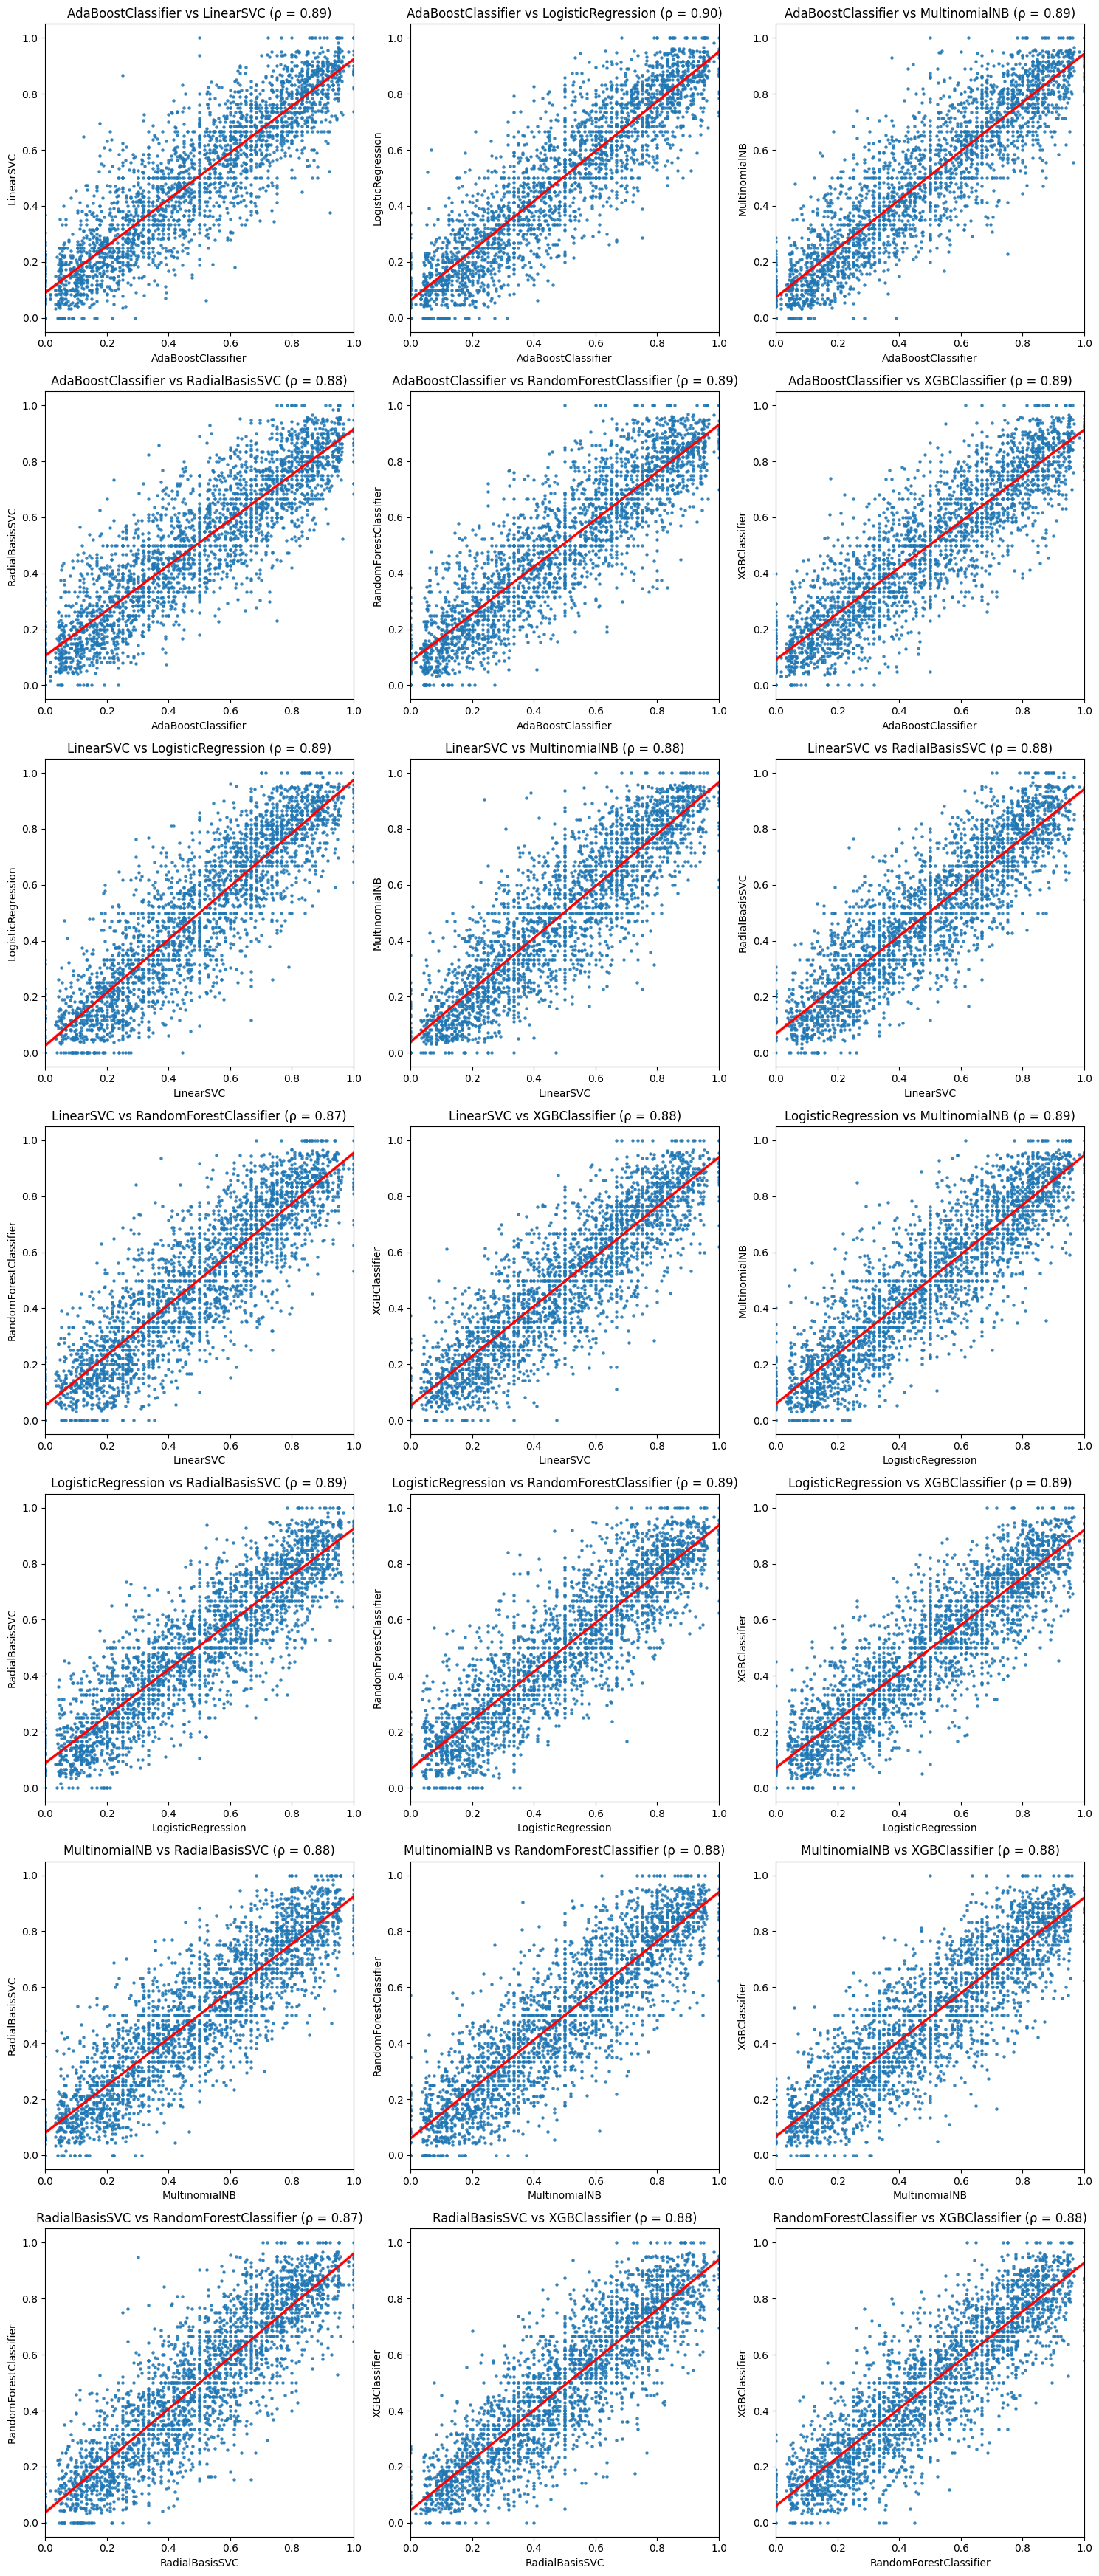

: 

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# Assuming that model_control_accuracy_pivot_df is your DataFrame
df = model_accuracy_pivot_df

models = df.columns
model_pairs = list(itertools.combinations(models, 2))

# Calculate the number of subplots needed
n = len(model_pairs)
ncols = 3  # number of columns of subplots
nrows = n // ncols + (n % ncols > 0)  # number of rows of subplots

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5))

# Flattening the axes, so it's easier to iterate through them
axes = axes.flatten()

# Iterate through each pair of models and plot the scatterplot
for pair, ax in zip(model_pairs, axes):
    sns.regplot(x=pair[0], y=pair[1], data=df, ax=ax, 
                scatter_kws={'s':5}, 
                line_kws={'color':'red'}, 
                robust=True)
    
    # Calculate Spearman correlation
    corr = df[[pair[0], pair[1]]].corr(method='spearman').iloc[0,1]
    ax.set_title(f'{pair[0]} vs {pair[1]} (ρ = {corr:.2f})')

# Delete any unused subplots
for i in range(len(model_pairs), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## Plot heatmap of variants x cases and variants x controls

- Sort samples by accuracy 
- Color by feature value
    - Cluster case variants, show dendogram
    - Order control variants by case clustering too

## Select outlier samples in accuracy distribution

In [45]:
accuracyThreshold = (0.85, 0.15)
accurateSamples = sampleResults[sampleResults['accuracy'] >= accuracyThreshold[0]].groupby(['id', 'label'])['accuracy'].mean().reset_index()
discordantSamples = sampleResults[sampleResults['accuracy'] <= accuracyThreshold[1]].groupby(['id', 'label'])['accuracy'].mean().reset_index()

In [46]:
print(f"total samples: {sampleResults['id'].unique().shape[0]}")
print(f"cases with classification accuracy above {accuracyThreshold[0]:.0%}: {accurateSamples.loc[accurateSamples['label'] == 1,'id'].unique().shape[0]}")
print(f"controls with classification accuracy above {accuracyThreshold[0]:.0%}: {accurateSamples.loc[accurateSamples['label'] == 0,'id'].unique().shape[0]}")

print(f"cases with classification accuracy above {accuracyThreshold[1]:.0%}: {discordantSamples.loc[discordantSamples['label'] == 1,'id'].unique().shape[0]}")
print(f"controls with classification accuracy above {accuracyThreshold[1]:.0%}: {discordantSamples.loc[discordantSamples['label'] == 0,'id'].unique().shape[0]}")

total samples: 2736
cases with classification accuracy above 85%: 695
controls with classification accuracy above 85%: 91
cases with classification accuracy above 15%: 410
controls with classification accuracy above 15%: 146


In [47]:
accurateSamples[[column for column in accurateSamples.columns if column not in ['shapExplanations']]]

id  label  accuracy
0          ALS__CGND-HDA-00004__UP-WGS-187      1  0.906250
1          ALS__CGND-HDA-00012__UP-WGS-195      1  0.906250
2          ALS__CGND-HDA-00013__UP-WGS-196      1  0.866667
3          ALS__CGND-HDA-00028__UP-WGS-211      1  0.915254
4          ALS__CGND-HDA-00051__UP-WGS-234      1  0.888889
5          ALS__CGND-HDA-00057__UP-WGS-241      1  0.920635
6          ALS__CGND-HDA-00064__UP-WGS-248      1  0.956522
7          ALS__CGND-HDA-00076__UP-WGS-260      1  0.882353
8          ALS__CGND-HDA-00101__UP-WGS-285      1  0.895349
9          ALS__CGND-HDA-00102__UP-WGS-286      1  0.868852
10         ALS__CGND-HDA-00111__UP-WGS-296      1  0.926829
11         ALS__CGND-HDA-00135__UP-WGS-320      1  0.933333
..                                     ...    ...       ...
774  aals-ALS__CGND-HDA-04069__NEUEA668FYK      1  0.913043
775  aals-ALS__CGND-HDA-04071__NEUCD063FGD      1  0.950000
776  aals-ALS__CGND-HDA-04075__NEUZA643DHA      1  0.875776
777  aals-ALS__CGND-HDA-04077__NEUAT541XCN      1  0.916667
778  aals-ALS__CGND-HDA-04078__NEUTE443RWG      1  0.886792
779  aals-ALS__CGND-HDA-04086__NEUDH813DE6      1  0.857143
780  aals-ALS__CGND-HDA-04089__NEUEU419NMF      1  0.926230
781  aals-CTR__CGND-HDA-03089__NEUGW842RG3      0  0.850000
782  aals-CTR__CGND-HDA-03142__NEURJ861MMD      0  0.893333
783  aals-CTR__CGND-HDA-03201__NEUWD043UBM      0  0.858333
784  aals-CTR__CGND-HDA-03584__NEUEB210XRC      0  0.876667
785  aals-CTR__CGND-HDA-03597__NEUBU578NX3      0  0.850000

[786 rows x 3 columns]

## View variants by sample accuracy

In [54]:
accurateCases

label  accuracy
id                                                    
ALS__CGND-HDA-01215__NEUUA360BR1           1      1.00
ALS__CGND-HDA-03062__UP-WGS-535            1      1.00
ALS__CGND-HDA-02741__PF-UCL-28             1      1.00
ALS__CGND-HDA-00353__358ALS                1      1.00
ALS__CGND-HDA-01013__NEUFL908GEL           1      1.00
ALS__CGND-HDA-00872__MH-WASHU-250          1      1.00
ALS__CGND-HDA-01813__TD-ALS-136            1      1.00
aals-ALS__CGND-HDA-04067__NEUJA207UUV      1      1.00
ALS__CGND-HDA-00644__MH-WASHU-22           1      1.00
ALS__CGND-HDA-03505__NEUBA645MFF           1      1.00
aals-ALS__CGND-HDA-03913__NEUJA497KXF      1      1.00
ALS__CGND-HDA-03630__NSTNNXTLA8ZQ          1      1.00
...                                      ...       ...
ALS__CGND-HDA-00290__2067ALS               1      0.85
ALS__CGND-HDA-03508__NEUBP660ENV           1      0.85
ALS__CGND-HDA-02615__UP-WGS-370            1      0.85
ALS__CGND-HDA-01298__EC21                  1      0.85
ALS__CGND-HDA-03409__NEUXD612TBW           1      0.85
ALS__CGND-HDA-02639__UP-WGS-394            1      0.85
ALS__CGND-HDA-03033__UP-WGS-506            1      0.85
ALS__CGND-HDA-01751__TD-ALS-20             1      0.85
ALS__CGND-HDA-04032__NEUJY975TFA           1      0.85
aals-ALS__CGND-HDA-03444__NEUEB422WW0      1      0.85
aals-ALS__CGND-HDA-03886__NEUDP959KRY      1      0.85
ALS__CGND-HDA-00357__819ALS                1      0.85

[695 rows x 2 columns]

In [55]:
accurateCaseEmbeddings

('1', '186347356', 'TPR')   
id                                                                \
ALS__CGND-HDA-01215__NEUUA360BR1                             0.0   
ALS__CGND-HDA-03062__UP-WGS-535                              0.0   
ALS__CGND-HDA-02741__PF-UCL-28                               0.0   
ALS__CGND-HDA-00353__358ALS                                  0.0   
ALS__CGND-HDA-01013__NEUFL908GEL                             0.0   
ALS__CGND-HDA-00872__MH-WASHU-250                            0.0   
ALS__CGND-HDA-01813__TD-ALS-136                              0.0   
aals-ALS__CGND-HDA-04067__NEUJA207UUV                        0.0   
ALS__CGND-HDA-00644__MH-WASHU-22                             1.0   
ALS__CGND-HDA-03505__NEUBA645MFF                             1.0   
aals-ALS__CGND-HDA-03913__NEUJA497KXF                        0.0   
ALS__CGND-HDA-03630__NSTNNXTLA8ZQ                            1.0   
...                                                          ...   
ALS__CGND-HDA-00290__2067ALS                                 0.0   
ALS__CGND-HDA-03508__NEUBP660ENV                             0.0   
ALS__CGND-HDA-02615__UP-WGS-370                              0.0   
ALS__CGND-HDA-01298__EC21                                    0.0   
ALS__CGND-HDA-03409__NEUXD612TBW                             1.0   
ALS__CGND-HDA-02639__UP-WGS-394                              0.0   
ALS__CGND-HDA-03033__UP-WGS-506                              0.0   
ALS__CGND-HDA-01751__TD-ALS-20                               0.0   
ALS__CGND-HDA-04032__NEUJY975TFA                             1.0   
aals-ALS__CGND-HDA-03444__NEUEB422WW0                        0.0   
aals-ALS__CGND-HDA-03886__NEUDP959KRY                        0.0   
ALS__CGND-HDA-00357__819ALS                                  1.0   

                                       ('1', '225419442', 'LBR')   
id                                                                \
ALS__CGND-HDA-01215__NEUUA360BR1                             1.0   
ALS__CGND-HDA-03062__UP-WGS-535                              1.0   
ALS__CGND-HDA-02741__PF-UCL-28                               1.0   
ALS__CGND-HDA-00353__358ALS                                  1.0   
ALS__CGND-HDA-01013__NEUFL908GEL                             1.0   
ALS__CGND-HDA-00872__MH-WASHU-250                            1.0   
ALS__CGND-HDA-01813__TD-ALS-136                              1.0   
aals-ALS__CGND-HDA-04067__NEUJA207UUV                        1.0   
ALS__CGND-HDA-00644__MH-WASHU-22                             1.0   
ALS__CGND-HDA-03505__NEUBA645MFF                             1.0   
aals-ALS__CGND-HDA-03913__NEUJA497KXF                        1.0   
ALS__CGND-HDA-03630__NSTNNXTLA8ZQ                            1.0   
...                                                          ...   
ALS__CGND-HDA-00290__2067ALS                                 1.0   
ALS__CGND-HDA-03508__NEUBP660ENV                             1.0   
ALS__CGND-HDA-02615__UP-WGS-370                              1.0   
ALS__CGND-HDA-01298__EC21                                    1.0   
ALS__CGND-HDA-03409__NEUXD612TBW                             1.0   
ALS__CGND-HDA-02639__UP-WGS-394                              1.0   
ALS__CGND-HDA-03033__UP-WGS-506                              1.0   
ALS__CGND-HDA-01751__TD-ALS-20                               1.0   
ALS__CGND-HDA-04032__NEUJY975TFA                             1.0   
aals-ALS__CGND-HDA-03444__NEUEB422WW0                        1.0   
aals-ALS__CGND-HDA-03886__NEUDP959KRY                        1.0   
ALS__CGND-HDA-00357__819ALS                                  1.0   

                                       ('1', '229487591', 'NUP133')   
id                                                                   \
ALS__CGND-HDA-01215__NEUUA360BR1                                1.0   
ALS__CGND-HDA-03062__UP-WGS-535                                 1.0   
ALS__CGND-HDA-02741__PF-UCL-28                                  0.0   
ALS__CGND-

In [148]:
topVariants

["('6', '17675015', 'NUP153')",
 "('7', '849532', 'SUN1')",
 "('7', '135584907', 'NUP205')",
 "('2', '183131014', 'NUP35')",
 "('3', '13319787', 'NUP210')",
 "('3', '13353975', 'NUP210')",
 "('18', '12984145', 'SEH1L')",
 "('7', '135607350', 'NUP205')",
 "('1', '246842749', 'AHCTF1')",
 "('7', '842031', 'SUN1')"]

In [155]:
outlierCaseEmbeddings.index

Index(['ALS__CGND-HDA-01215__NEUUA360BR1', 'ALS__CGND-HDA-00644__MH-WASHU-22',
       'ALS__CGND-HDA-03062__UP-WGS-535', 'ALS__CGND-HDA-02651__UP-WGS-406',
       'aals-ALS__CGND-HDA-03814__NEUCH829YF0',
       'ALS__CGND-HDA-03630__NSTNNXTLA8ZQ',
       'aals-ALS__CGND-HDA-03913__NEUJA497KXF',
       'ALS__CGND-HDA-03505__NEUBA645MFF',
       'aals-ALS__CGND-HDA-04067__NEUJA207UUV',
       'ALS__CGND-HDA-01813__TD-ALS-136',
       ...
       'ALS__CGND-HDA-02288__13-190-33', 'ALS__CGND-HDA-02561__93-094-34',
       'aals-ALS__CGND-HDA-02700__NEUPP607CPW',
       'aals-ALS__CGND-HDA-00234__NEUZN836GME',
       'ALS__CGND-HDA-02422__03-151-16',
       'aals-ALS__CGND-HDA-03560__NEUET719NJD',
       'ALS__CGND-HDA-03442__NEUYU889EY1', 'ALS__CGND-HDA-01795__TD-ALS-87',
       'ALS__CGND-HDA-03696__NEUBZ354DBH',
       'aals-ALS__CGND-HDA-03605__NEUPJ681DUM'],
      dtype='object', name='id', length=1105)

In [159]:
import dash_bio

accurateCases = accurateSamples.loc[accurateSamples['label'] == 1].sort_values(by=['accuracy'], ascending=False).set_index('id', drop=True)
accurateCaseEmbeddings = embedding.loc[embedding.index.isin(accurateCases.index)].reindex(accurateCases.index)
accurateControls = accurateSamples.loc[accurateSamples['label'] == 0].sort_values(by=['accuracy'], ascending=False).set_index('id', drop=True)
accurateControlEmbeddings = embedding.loc[embedding.index.isin(accurateControls.index)].reindex(accurateControls.index)

discordantCases = discordantSamples.loc[discordantSamples['label'] == 1].sort_values(by=['accuracy'], ascending=False).set_index('id', drop=True)
discordantCaseEmbeddings = embedding.loc[embedding.index.isin(discordantCases.index)].reindex(discordantCases.index)
discordantControls = discordantSamples.loc[discordantSamples['label'] == 0].sort_values(by=['accuracy'], ascending=False).set_index('id', drop=True)
discordantControlEmbeddings = embedding.loc[embedding.index.isin(discordantControls.index)].reindex(discordantControls.index)

outlierCases = pd.concat([accurateCases, discordantCases]).sort_values(by=['accuracy'], ascending=False)
outlierCaseEmbeddings = embedding.loc[embedding.index.isin(outlierCases.index)].reindex(outlierCases.index)

outlierControls = pd.concat([accurateControls, discordantControls]).sort_values(by=['accuracy'], ascending=False)
outlierControlEmbeddings = embedding.loc[embedding.index.isin(outlierControls.index)].reindex(outlierControls.index)

outlierSamples = pd.concat([accurateSamples, discordantSamples]).sort_values(by=['accuracy'], ascending=False)
outlierEmbeddings = embedding.loc[embedding.index.isin(outlierSamples.index)].reindex(outlierSamples.index)

topVariants = averageCaseGlobalFeatureImportances.iloc[:10].index
outlierCaseEmbeddings = outlierCaseEmbeddings[topVariants]
outlierControlEmbeddings = outlierControlEmbeddings[topVariants]


plot = dash_bio.Clustergram(
    data=outlierCaseEmbeddings.T.values,
    row_labels=list(outlierCaseEmbeddings.columns.values),
    column_labels=list(outlierCaseEmbeddings.index),
    hidden_labels='column',
    cluster='row',
    height=1200,
    width=1200,
    color_map= [
        [0.0, '#636EFA'],
        [0.25, '#AB63FA'],
        [0.5, '#FFFFFF'],
        [0.75, '#E763FA'],
        [1.0, '#EF553B']
    ])
plot.update_layout(title={'text': 'Outlier Case Variants (Accuracy >= 85% or <= 15%, highest on left)', 'x': 0.5, 'xanchor': 'center'})
plot.write_html('outlier_cases_clustergram.html')

# TODO filter important variants 
plot = dash_bio.Clustergram(
    data=outlierControlEmbeddings.T.values,
    row_labels=list(outlierControlEmbeddings.columns.values),
    column_labels=list(outlierControlEmbeddings.index),
    hidden_labels='column',
    cluster='row',
    height=1200,
    width=1200,
    color_map= [
        [0.0, '#636EFA'],
        [0.25, '#AB63FA'],
        [0.5, '#FFFFFF'],
        [0.75, '#E763FA'],
        [1.0, '#EF553B']
    ])
plot.update_layout(title={'text': 'Outlier Control Variants (Accuracy >= 85% or <= 15%, highest on left)', 'x': 0.5, 'xanchor': 'center'})
plot.write_html('outlier_controls_clustergram.html')

plot = dash_bio.Clustergram(
    data=embedding.T.values,
    row_labels=list(embedding.columns.values),
    column_labels=list(embedding.index),
    hidden_labels='column',
    cluster='row',
    height=1200,
    width=1200,
    color_map= [
        [0.0, '#636EFA'],
        [0.25, '#AB63FA'],
        [0.5, '#FFFFFF'],
        [0.75, '#E763FA'],
        [1.0, '#EF553B']
    ])
plot.update_layout(title={'text': 'Outlier Case & Control Variants (Accuracy >= 85% or <= 15%, highest on left)', 'x': 0.5, 'xanchor': 'center'})
plot.write_html('outliers_clustergram.html')

In [57]:

plot = dash_bio.Clustergram(
    data=discordantCaseEmbeddings.T.values,
    row_labels=list(discordantCaseEmbeddings.columns.values),
    column_labels=list(discordantCaseEmbeddings.index),
    hidden_labels='column',
    cluster='row',
    height=1200,
    width=1200,
    color_map= [
        [0.0, '#636EFA'],
        [0.25, '#AB63FA'],
        [0.5, '#FFFFFF'],
        [0.75, '#E763FA'],
        [1.0, '#EF553B']
    ])
plot.update_layout(title={'text': 'Discordant Case Variants (Accuracy <= 15%, highest on left)', 'x': 0.5, 'xanchor': 'center'})
plot.write_html('discordant_cases_clustergram.html')

plot = dash_bio.Clustergram(
    data=discordantControlEmbeddings.T.values,
    row_labels=list(discordantControlEmbeddings.columns.values),
    column_labels=list(discordantControlEmbeddings.index),
    hidden_labels='column',
    cluster='row',
    height=1200,
    width=1200,
    color_map= [
        [0.0, '#636EFA'],
        [0.25, '#AB63FA'],
        [0.5, '#FFFFFF'],
        [0.75, '#E763FA'],
        [1.0, '#EF553B']
    ])
plot.update_layout(title={'text': 'Discordant Control Variants (Accuracy <= 15%, highest on left)', 'x': 0.5, 'xanchor': 'center'})
plot.write_html('discordant_controls_clustergram.html')


In [51]:
accurateCaseEmbeddings


('1', '186347356', 'TPR')   
id                                                                \
ALS__CGND-HDA-01215__NEUUA360BR1                             0.0   
ALS__CGND-HDA-03062__UP-WGS-535                              0.0   
ALS__CGND-HDA-02741__PF-UCL-28                               0.0   
ALS__CGND-HDA-00353__358ALS                                  0.0   
ALS__CGND-HDA-01013__NEUFL908GEL                             0.0   
ALS__CGND-HDA-00872__MH-WASHU-250                            0.0   
ALS__CGND-HDA-01813__TD-ALS-136                              0.0   
aals-ALS__CGND-HDA-04067__NEUJA207UUV                        0.0   
ALS__CGND-HDA-00644__MH-WASHU-22                             1.0   
ALS__CGND-HDA-03505__NEUBA645MFF                             1.0   
aals-ALS__CGND-HDA-03913__NEUJA497KXF                        0.0   
ALS__CGND-HDA-03630__NSTNNXTLA8ZQ                            1.0   
...                                                          ...   
ALS__CGND-HDA-00290__2067ALS                                 0.0   
ALS__CGND-HDA-03508__NEUBP660ENV                             0.0   
ALS__CGND-HDA-02615__UP-WGS-370                              0.0   
ALS__CGND-HDA-01298__EC21                                    0.0   
ALS__CGND-HDA-03409__NEUXD612TBW                             1.0   
ALS__CGND-HDA-02639__UP-WGS-394                              0.0   
ALS__CGND-HDA-03033__UP-WGS-506                              0.0   
ALS__CGND-HDA-01751__TD-ALS-20                               0.0   
ALS__CGND-HDA-04032__NEUJY975TFA                             1.0   
aals-ALS__CGND-HDA-03444__NEUEB422WW0                        0.0   
aals-ALS__CGND-HDA-03886__NEUDP959KRY                        0.0   
ALS__CGND-HDA-00357__819ALS                                  1.0   

                                       ('1', '225419442', 'LBR')   
id                                                                \
ALS__CGND-HDA-01215__NEUUA360BR1                             1.0   
ALS__CGND-HDA-03062__UP-WGS-535                              1.0   
ALS__CGND-HDA-02741__PF-UCL-28                               1.0   
ALS__CGND-HDA-00353__358ALS                                  1.0   
ALS__CGND-HDA-01013__NEUFL908GEL                             1.0   
ALS__CGND-HDA-00872__MH-WASHU-250                            1.0   
ALS__CGND-HDA-01813__TD-ALS-136                              1.0   
aals-ALS__CGND-HDA-04067__NEUJA207UUV                        1.0   
ALS__CGND-HDA-00644__MH-WASHU-22                             1.0   
ALS__CGND-HDA-03505__NEUBA645MFF                             1.0   
aals-ALS__CGND-HDA-03913__NEUJA497KXF                        1.0   
ALS__CGND-HDA-03630__NSTNNXTLA8ZQ                            1.0   
...                                                          ...   
ALS__CGND-HDA-00290__2067ALS                                 1.0   
ALS__CGND-HDA-03508__NEUBP660ENV                             1.0   
ALS__CGND-HDA-02615__UP-WGS-370                              1.0   
ALS__CGND-HDA-01298__EC21                                    1.0   
ALS__CGND-HDA-03409__NEUXD612TBW                             1.0   
ALS__CGND-HDA-02639__UP-WGS-394                              1.0   
ALS__CGND-HDA-03033__UP-WGS-506                              1.0   
ALS__CGND-HDA-01751__TD-ALS-20                               1.0   
ALS__CGND-HDA-04032__NEUJY975TFA                             1.0   
aals-ALS__CGND-HDA-03444__NEUEB422WW0                        1.0   
aals-ALS__CGND-HDA-03886__NEUDP959KRY                        1.0   
ALS__CGND-HDA-00357__819ALS                                  1.0   

                                       ('1', '229487591', 'NUP133')   
id                                                                   \
ALS__CGND-HDA-01215__NEUUA360BR1                                1.0   
ALS__CGND-HDA-03062__UP-WGS-535                                 1.0   
ALS__CGND-HDA-02741__PF-UCL-28                                  0.0   
ALS__CGND-

## Find patients that have top variants based on model coefficients

### locally-tracked files

In [26]:
import os

bootstrapPath = f"../src/{config['project']}/bootstraps"
bootstrapDirs = os.listdir(bootstrapPath)
bootstrapDirs = [int(bootstrapDir) for bootstrapDir in bootstrapDirs]
bootstrapDirs.sort()

modelCoefficientsDir = f"../src/{config['project']}/averageModelCoefficients"
modelCoefficientsFiles = os.listdir(modelCoefficientsDir)

In [155]:
import pandas as pd
import numpy as np

def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

generallyImportantAverage = pd.DataFrame()
caseImportanceAverage = pd.DataFrame()
controlImportanceAverage = pd.DataFrame()

for modelCoefficientFile in modelCoefficientsFiles:
    modelCoefficientDF = pd.read_csv(f"{modelCoefficientsDir}/{modelCoefficientFile}")
    model_name = modelCoefficientFile.split('.')[0]
    
    if "feature_importances_control" in modelCoefficientDF.columns and ("feature_importances" in modelCoefficientDF.columns 
        or 'feature_importances_case' in modelCoefficientDF.columns
    ):        
            
        if "feature_importances" in modelCoefficientDF.columns and not (modelCoefficientDF['feature_importances_control'].abs() == modelCoefficientDF['feature_importances'].abs()).all():
            modelCoefficientDF['feature_importances_control'] = min_max_normalize(modelCoefficientDF['feature_importances_control'])
            modelCoefficientDF['feature_importances'] = min_max_normalize(modelCoefficientDF['feature_importances'])
            modelCoefficientDF = modelCoefficientDF.rename(columns={'feature_importances_control': f"{model_name}_control_importance", 'feature_importances': f"{model_name}_case_importance"})
       
        if 'feature_importances_case' in modelCoefficientDF.columns and not (modelCoefficientDF['feature_importances_control'].abs() == modelCoefficientDF['feature_importances_case'].abs()).all():
            modelCoefficientDF['feature_importances_case'] = min_max_normalize(modelCoefficientDF['feature_importances_case'])
            modelCoefficientDF['feature_importances_control'] = min_max_normalize(modelCoefficientDF['feature_importances_control'])
            modelCoefficientDF = modelCoefficientDF.rename(columns={'feature_importances_case': f"{model_name}_case_importance", 'feature_importances_control': f"{model_name}_control_importance"})
       
        else: 
            # drop redundant values
            modelCoefficientDF = modelCoefficientDF.drop(columns=['feature_importances_control'])
            modelCoefficientDF = modelCoefficientDF.rename(columns={('feature_importances_case' if 'feature_importances_case' in modelCoefficientDF else 'feature_importances'): f"{model_name}_importance"})
            modelCoefficientDF[f"{model_name}_importance"] = min_max_normalize(modelCoefficientDF[f"{model_name}_importance"])
            generallyImportantAverage = pd.concat([generallyImportantAverage, modelCoefficientDF.set_index('features')[f"{model_name}_importance"]], axis=1)
            continue

        controlImportanceAverage = pd.concat([controlImportanceAverage, modelCoefficientDF.set_index('features')[f"{model_name}_control_importance"]], axis=1)
        caseImportanceAverage = pd.concat([caseImportanceAverage, modelCoefficientDF.set_index('features')[f"{model_name}_case_importance"]], axis=1)
   
    modelCoefficientDF = modelCoefficientDF.rename(columns={'feature_importances': f"{model_name}_importance"})
    modelCoefficientDF[f"{model_name}_importance"] = min_max_normalize(modelCoefficientDF[f"{model_name}_importance"])
    generallyImportantAverage = pd.concat([generallyImportantAverage, modelCoefficientDF.set_index('features')[f"{model_name}_importance"]], axis=1)

# Calculate means and standard deviations before sorting
# The standard deviations should be ordered in the same way as the averages

# Create a new DataFrame to store averages
generallyImportantAverage_numeric = pd.DataFrame(index=generallyImportantAverage.index)
caseImportanceAverage_numeric = pd.DataFrame(index=caseImportanceAverage.index)
controlImportanceAverage_numeric = pd.DataFrame(index=controlImportanceAverage.index)

# Iterate over each column
for col in generallyImportantAverage.columns:
    # Check if column is numeric
    if np.issubdtype(generallyImportantAverage[col].dtypes, np.number):
        # Calculate mean and standard deviation
        generallyImportantAverage['mean'] = generallyImportantAverage.mean(axis=1)
        generallyImportantAverage['std'] = generallyImportantAverage.std(axis=1)

for col in caseImportanceAverage.columns:
    # Check if column is numeric
    if np.issubdtype(caseImportanceAverage[col].dtypes, np.number):
        # Calculate mean and standard deviation
        caseImportanceAverage['mean'] = caseImportanceAverage.mean(axis=1)
        caseImportanceAverage['std'] = caseImportanceAverage.std(axis=1)

for col in controlImportanceAverage.columns:
    # Check if column is numeric
    if np.issubdtype(controlImportanceAverage[col].dtypes, np.number):
        # Calculate mean and standard deviation
        controlImportanceAverage['mean'] = controlImportanceAverage.mean(axis=1)
        controlImportanceAverage['std'] = controlImportanceAverage.std(axis=1)


# Concatenate original dataframes with statistics dataframes
generallyImportantMerged = pd.concat([generallyImportantAverage, generallyImportantAverage_numeric], axis=1)
caseImportanceMerged = pd.concat([caseImportanceAverage, caseImportanceAverage_numeric], axis=1)
controlImportanceMerged = pd.concat([controlImportanceAverage, controlImportanceAverage_numeric], axis=1)


KeyError: 'MultinomialNB_importance'

In [154]:
import plotly.graph_objects as go

# Your dataframes
dataframes = [generallyImportantMerged, caseImportanceMerged, controlImportanceMerged]
names = ['ALS Generally Important Parameters', 'ALS Case-important Parameters — Multinomial Naive Bayes', 'ALS Control-important Parameters — Multinomial Naive Bayes']

# For each dataframe
for df, name in zip(dataframes, names):
    # Create a new Figure
    fig = go.Figure()
    
    df = df.sort_values(by='mean', ascending=False)
    color = 'blue' if 'case' in name.lower() else 'red' if 'control' in name.lower() else None
    # For each model
    for model in df.columns:
        if "importance" in model:
            fig.add_trace(go.Bar(
                name=model.split('_')[0],  # Model name
                x=df.index,  # Features
                y=df[model],  # Importance
                error_y=dict(
                    type='data',  # The errors are data not a percentage
                    array=df["std"],  # Std
                    visible=True
                ),
                marker_color=color  # Color
            ))

    # Update the layout and show the figure
    fig.update_layout(
        barmode='group',  # Grouped bar chart
        title=name,  # Title
        yaxis_title='Importance',  # y-axis label
        xaxis=dict(
            tickangle=45,  # adjust as needed
            title='Features',
            titlefont_size=16,
            tickfont_size=9,  # decrease font size if needed
        ),
    )
    fig.show()
    fig.write_html(f"{name}.html")


In [149]:
def plot_feature_importance(df, df_std, title, color):
    fig = go.Figure(data=[go.Bar(
        x=df.index,
        y=df.values,
        error_y=dict(type='data', array=df_std, visible=True),
        text=df.values.round(2),
        textposition='auto',
        marker_color=color
    )])
    
    # Create custom tick positions and labels
    tickvals = list(range(len(df.index)))
    ticktext = df.index.tolist()

    fig.update_layout(
        title_text=title,
        bargap=0.2,
        xaxis=dict(
            tickmode='array',
            tickvals=tickvals,
            ticktext=ticktext,
            tickangle=45,  # adjust as needed
            title='Features',
            titlefont_size=16,
            tickfont_size=9,  # decrease font size if needed
        ),
        yaxis=dict(
            title='Feature Importance',
            titlefont_size=16,
            tickfont_size=14,
        ),
    )
    fig.show()

# Pass both the averages and standard deviations to the plotting function
generallyImportantSortedMean = generallyImportantMerged.sort_values(by='mean', ascending=False, )
plot_feature_importance(generallyImportantSortedMean['mean'], generallyImportantSortedMean['std'], "ALS Generally Important Averaged Model Parameters — Sorted by average", 'green')

generallyImportantSortedStd = generallyImportantMerged.sort_values(by='std', ascending=True)
plot_feature_importance(generallyImportantSortedStd['mean'], generallyImportantSortedStd['std'], "ALS Generally Important Averaged Model Parameters — Sorted by 1 standard deviation", 'green')


In [46]:
import plotly.graph_objects as go

# Example data
features = generallyImportantAverage.index
general_values = generallyImportantAverage.values
case_values = caseImportanceAverage.values
control_values = controlImportanceAverage.values

general_error = generallyImportantStd.values
case_error = caseImportanceStd.values
control_error = controlImportanceStd.values

# Create traces
trace_general = go.Bar(
    x=features,
    y=general_values,
    name='General',
    error_y=dict(type='data', array=general_error, visible=True)
)

trace_case = go.Bar(
    x=features,
    y=case_values,
    name='Case',
    error_y=dict(type='data', array=case_error, visible=True)
)

trace_control = go.Bar(
    x=features,
    y=control_values,
    name='Control',
    error_y=dict(type='data', array=control_error, visible=True)
)

# Create layout
layout = go.Layout(
    title='Feature Importance Comparison',
    barmode='group',
    autosize=False,
    width=800,
    height=500,
    xaxis=dict(
        title='Features',
        tickangle=45,
        titlefont_size=16,
        tickfont_size=9,
    ),
    yaxis=dict(
        title='Feature Importance',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

# Create figure and add traces
fig = go.Figure(data=[trace_general, trace_case, trace_control], layout=layout)

# Show plot
fig.show()


In [44]:
topGeneralVariants = generallyImportantAverage.sort_values(ascending=False).iloc[:10]
topGeneralVariantEmbeddings = embedding.loc[:,topGeneralVariants.index]
topGeneralVariantEmbeddings.index = embedding['Unnamed: 0']
topGeneralVariantEmbeddings.index.name = 'id'

topCaseVariantEmbeddings = caseImportanceAverage.sort_values(ascending=False).iloc[:10]
topControlVariantEmbeddings = caseImportanceAverage.sort_values(ascending=False).iloc[:-10]
topCaseVariantEmbeddings = embedding.loc[:]

In [45]:
def get_sample_ids_all_minor(df):
    return df[df.eq(1).all(axis=1)].index.tolist()

topGeneralVariantSampleIds_all_minor = get_sample_ids_all_minor(topGeneralVariantEmbeddings)
topCaseVariantSampleIds_all_minor = get_sample_ids_all_minor(topCaseVariantEmbeddings)
topControlVariantSampleIds_all_minor = get_sample_ids_all_minor(topControlVariantEmbeddings)

# Printing results
print("Sample IDs for top general variants (all minor alleles):", topGeneralVariantSampleIds_all_minor)
print("Sample IDs for top case variants (all minor alleles):", topCaseVariantSampleIds_all_minor)
print("Sample IDs for top control variants (all minor alleles):", topControlVariantSampleIds_all_minor)


In [ ]:
import pandas as pd

def write_to_csv(sample_ids, filename):
    series = pd.Series(sample_ids)
    series.to_csv(filename, index=False)

write_to_csv(topGeneralVariantSampleIds_all_minor, "topGeneralVariantSampleIds_all_minor.csv")
write_to_csv(topCaseVariantSampleIds_all_minor, "topCaseVariantSampleIds_all_minor.csv")
write_to_csv(topControlVariantSampleIds_all_minor, "topControlVariantSampleIds_all_minor.csv")

In [43]:
embedding

Unnamed: 0  ('1', '186347356', 'TPR')   
id                                                                      
0    aals-ALS__CGND-HDA-04073__NEUBZ512CWM                        0.0  \
1    aals-ALS__CGND-HDA-04072__NEUHR014RCJ                        0.0   
2    aals-ALS__CGND-HDA-04068__NEUAX021NPV                        0.0   
3    aals-ALS__CGND-HDA-04067__NEUJA207UUV                        0.0   
4    aals-ALS__CGND-HDA-04065__NEULP450TP2                        0.0   
..                                     ...                        ...   
162        ALS__CGND-HDA-03038__UP-WGS-511                        0.0   
273         ALS__CGND-HDA-02291__14-198-02                        0.0   
291         ALS__CGND-HDA-02164__PF-UCH-26                        1.0   
120       ALS__CGND-HDA-03442__NEUYU889EY1                        1.0   
3    aals-ALS__CGND-HDA-04077__NEUAT541XCN                        0.0   

     ('1', '225419442', 'LBR')  ('1', '229487591', 'NUP133')   
id                                                             
0                          1.0                           0.0  \
1                          1.0                           0.0   
2                          1.0                           0.0   
3                          1.0                           0.0   
4                          1.0                           0.0   
..                         ...                           ...   
162                        1.0                           0.0   
273                        1.0                           0.0   
291                        1.0                           1.0   
120                        1.0                           0.0   
3                          1.0                           1.0   

     ('1', '229495987', 'NUP133')  ('1', '246842749', 'AHCTF1')   
id                                                                
0                             0.0                           0.0  \
1                             0.0                           1.0   
2                             0.0                           0.0   
3                             0.0                           0.0   
4                             0.0                           0.0   
..                            ...                           ...   
162                           0.0                           0.0   
273                           0.0                           0.0   
291                           1.0                           1.0   
120                           0.0                           0.0   
3                             1.0                           0.0   

     ('1', '246861024', 'AHCTF1')  ('1', '246877229', 'AHCTF1')   
id                                                                
0                             0.0                           0.0  \
1                             0.0                           0.0   
2                             0.0                           0.0   
3                             0.0                           0.0   
4                             0.0                           0.0   
..                            ...                           ...   
162                           0.0                           0.0   
273                           0.0                           0.0   
291                           1.0                           0.0   
120                           0.0                           0.0   
3                             0.0                           0.0   

     ('1', '246885532', 'AHCTF1')  ('2', '183131001', 'NUP35')  ...   
id                                                              ...   
0                             1.0                          0.0  ...  \
1                             1.0                          0.0  ...   
2                             1.0                          0.0  ...   
3                             1.0                          1.0  ...   
4                             1.0                          0.0  ...   
..      

## Shapely value distribution for well-classified samples

In [24]:
def serialize_sample_shap(sampleValues):
    # some models only have probabilities for a single class
    return sampleValues.values[:,1] if len(sampleValues.values.shape) > 1 else sampleValues.values

serializedData = []
for sampleValues in accurateSamples['shapExplanations']:
    serializedData.append(serialize_sample_shap(sampleValues))
    
shapelyValueDataframe = pd.DataFrame(serializedData, columns=accurateSamples.iloc[0]['shapExplanations'].feature_names)
shapelyValueDataframe.index = accurateSamples['id']

In [25]:
accurateSamples['shapExplanations'].iloc[0].values[0]

array([ 0.00208532, -0.00208532])

In [26]:
shapelyValueDataframe

1_186347356_TPR  1_225419442_LBR   
id                                                                       \
ALS__CGND-HDA-00028__UP-WGS-211              -0.002085     1.105033e-05   
ALS__CGND-HDA-00028__UP-WGS-211               0.000000     0.000000e+00   
ALS__CGND-HDA-00028__UP-WGS-211              -0.031587     8.240942e-05   
ALS__CGND-HDA-00028__UP-WGS-211              -0.053750     0.000000e+00   
ALS__CGND-HDA-00028__UP-WGS-211              -0.003167     1.814708e-05   
ALS__CGND-HDA-00028__UP-WGS-211              -0.001699     0.000000e+00   
ALS__CGND-HDA-00028__UP-WGS-211               0.134497     0.000000e+00   
ALS__CGND-HDA-00028__UP-WGS-211              -0.020860     2.516267e-05   
ALS__CGND-HDA-00028__UP-WGS-211              -0.011680     7.367027e-05   
ALS__CGND-HDA-00028__UP-WGS-211              -0.025460    -6.109835e-06   
ALS__CGND-HDA-00028__UP-WGS-211              -0.014768     4.648942e-04   
ALS__CGND-HDA-00057__UP-WGS-241              -0.002339     5.526784e-05   
ALS__CGND-HDA-00057__UP-WGS-241               0.000000     0.000000e+00   
ALS__CGND-HDA-00057__UP-WGS-241              -0.002299     4.439709e-05   
ALS__CGND-HDA-00057__UP-WGS-241              -0.033488     2.469136e-04   
ALS__CGND-HDA-00057__UP-WGS-241               0.011042     0.000000e+00   
ALS__CGND-HDA-00057__UP-WGS-241              -0.000353     0.000000e+00   
ALS__CGND-HDA-00057__UP-WGS-241              -0.015618     1.897583e-03   
ALS__CGND-HDA-00057__UP-WGS-241              -0.001680     4.558489e-05   
ALS__CGND-HDA-00057__UP-WGS-241               0.000000     0.000000e+00   
ALS__CGND-HDA-00057__UP-WGS-241              -0.025000     9.239130e-04   
ALS__CGND-HDA-00057__UP-WGS-241              -0.004975     2.086158e-05   
ALS__CGND-HDA-00057__UP-WGS-241               0.000000     0.000000e+00   
ALS__CGND-HDA-00057__UP-WGS-241              -0.011453     0.000000e+00   
ALS__CGND-HDA-00057__UP-WGS-241              -0.024816     0.000000e+00   
ALS__CGND-HDA-00057__UP-WGS-241              -0.021114     0.000000e+00   
ALS__CGND-HDA-00057__UP-WGS-241               0.000766     1.000237e-03   
ALS__CGND-HDA-00057__UP-WGS-241              -0.031278     1.661017e-04   
ALS__CGND-HDA-00057__UP-WGS-241              -0.021906     5.445545e-04   
ALS__CGND-HDA-00057__UP-WGS-241              -0.038750     0.000000e+00   
ALS__CGND-HDA-00057__UP-WGS-241              -0.025000     0.000000e+00   
ALS__CGND-HDA-00057__UP-WGS-241              -0.163750     0.000000e+00   
ALS__CGND-HDA-00135__UP-WGS-320               0.004400     1.333333e-04   
ALS__CGND-HDA-00135__UP-WGS-320               0.000000     0.000000e+00   
ALS__CGND-HDA-00135__UP-WGS-320              -0.000208     0.000000e+00   
ALS__CGND-HDA-00135__UP-WGS-320              -0.033968     0.000000e+00   
ALS__CGND-HDA-00135__UP-WGS-320              -0.000833     3.703704e-04   
...                                                ...              ...   
aals-ALS__CGND-HDA-04067__NEUJA207UUV         0.000913     3.798463e-05   
aals-ALS__CGND-HDA-04067__NEUJA207UUV         0.000000     0.000000e+00   
aals-ALS__CGND-HDA-04067__NEUJA207UUV         0.000000     1.250000e-03   
aals-ALS__CGND-HDA-04067__NEUJA207UUV         0.000240     2.933198e-06   
aals-ALS__CGND-HDA-04067__NEUJA207UUV        -0.000004     1.163469e-06   
aals-ALS__CGND-HDA-04067__NEUJA207UUV         0.000173     2.868254e-05   
aals-ALS__CGND-HDA-04067__NEUJA207UUV         0.012248     5.275229e-04   
aals-ALS__CGND-HDA-04067__NEUJA207UUV         0.008363     4.287109e-05   
aals-ALS__CGND-HDA-04067__NEUJA207UUV         0.000000     0.000000e+00   
aals-ALS__CGND-HDA-04067__NEUJA207UUV         0.000000     0.000000e+00   
aals-ALS__CGND-HDA-04067__NEUJA207UUV         0.000000     0.000000e+00   
aals-ALS__CGND-HDA-04067__NEUJA207UUV        -0.002488     1.230680e-05   
aals-ALS__CGND-HDA-04067__NEUJA207UUV        -0.000002    -1.834201e-08   
aals-ALS__CGND-HDA-04067__NEUJA207UUV        -0.000103     0.000

In [28]:
import numpy as np
import plotly.express as px

df_stats = shapelyValueDataframe.describe().T

# Create a DataFrame for the plotting
df_plot_mean = df_stats[['mean']].reset_index()
df_plot_std = df_stats[['std']].reset_index()

# Sort by the greatest mean Shapley value and least standard deviation
df_plot_mean = df_plot_mean.sort_values(['mean'], ascending=False)
df_plot_std = df_plot_std.sort_values(['std'], ascending=True)

# Create a bar chart for means
fig_mean = px.bar(df_plot_mean, x='index', y='mean', labels={'index':'Feature', 'mean':'Mean Shapely Value'})
fig_mean.show()

# Create a bar chart for standard deviations
fig_std = px.bar(df_plot_std, x='index', y='std', labels={'index':'Feature', 'std':'Standard Deviation'})
fig_std.show()


In [38]:
df_stats[['mean', 'std']].corr(method='pearson')

mean       std
mean  1.000000  0.714121
std   0.714121  1.000000

In [54]:
accurateCases = [id for id in accurateSamples['id'].unique() if "CTR" not in id]
pd.Series(accurateCases, name='id').to_csv('accurateCases.csv', index=False)

In [55]:
discordantSampleIDs = discordantSamples['id'].unique()
discordantCases = [id for id in discordantSampleIDs if "CTR" not in id]
pd.Series(discordantCases, name='id').to_csv('discordantCases.csv', index=False)

In [50]:
discordantSampleIDs

array(['ALS__CGND-HDA-00277__2140ALS', 'ALS__CGND-HDA-00317__362ALS',
       'ALS__CGND-HDA-00323__820ALS', 'ALS__CGND-HDA-00332__2271ALS',
       'ALS__CGND-HDA-00360__125ALS', 'ALS__CGND-HDA-00782__MH-WASHU-160',
       'ALS__CGND-HDA-00845__MH-WASHU-223',
       'ALS__CGND-HDA-01098__276-11-5',
       'ALS__CGND-HDA-01224__NEUUM419GYB', 'ALS__CGND-HDA-01294__EC11',
       'ALS__CGND-HDA-01489__NEUGY188ZTM',
       'ALS__CGND-HDA-01539__UP-WGS-017',
       'ALS__CGND-HDA-01591__UP-WGS-069',
       'ALS__CGND-HDA-01795__TD-ALS-87',
       'ALS__CGND-HDA-01824__TD-ALS-129',
       'ALS__CGND-HDA-01897__TD-ALS-143',
       'ALS__CGND-HDA-02089__NEUWZ812JXY',
       'ALS__CGND-HDA-02254__NEUMG708VB0',
       'ALS__CGND-HDA-02288__13-190-33', 'ALS__CGND-HDA-02313__05-156-09',
       'ALS__CGND-HDA-02329__96-119-66', 'ALS__CGND-HDA-02340__94-106-48',
       'ALS__CGND-HDA-02365__91-072-76', 'ALS__CGND-HDA-02392__87-017-42',
       'ALS__CGND-HDA-02413__98-130-70', 'ALS__CGND-HDA-02416__97-